# Final Project: **Penerapan Sistem Rekomendasi untuk Meningkatkan Penjualan dan Kepuasan Pelanggan Menggunakan Model *Neural Collaborative Filtering* (NCF)**
1.   Dea Naila Wiliska
2.   Insania Cindy P. F  
3.   Adinda Yulia Safitri
4.   Sheila Azalia Zahra

# **Pendahuluan**

Sumber dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

PPT : https://drive.google.com/file/d/1PmTz1YcFc06A32rh0QCCZS7TsEvctEpP/view?usp=sharing

## Preparing

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Wrangling**

## Gathering Data

### Memuat tabel order

In [ ]:
orders_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekai/E-Commerce Public Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Membuat tabel customer

In [ ]:
customers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekai/E-Commerce Public Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Memuat tabel seller

In [ ]:
sellers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekai/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Memuat tabel products

In [ ]:
products_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekai/E-Commerce Public Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Memuat tabel geolocation

In [ ]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekai/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Memuat tabel order item

In [ ]:
order_items_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekai/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Memuat tabel order payment

In [ ]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekai/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Memuat tabel order review

In [ ]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekai/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Assesing Data

### **orders_df**

### Menilai data

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Jika diperhatikan, jumlah data pada order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date tidak lengkap, kemungkinan terdapat missing values didalamnya. Selain itu, terdapat kesalahan tipe data untuk order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date. Keempat kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.

### Menampilkan missing values

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


### Menampilkan duplikasi data

In [ ]:
print("Jumlah duplikasi : ", orders_df.duplicated().sum())

Jumlah duplikasi :  0


Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel orders_df tidak terdapat duplikasi data

### **customers_df**

### Menilai data

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Jika diperhatikan, jumlah data pada customers_df sudah lengkap atau dengan kata lain tidak ada missing value didalamnya.

### Re-check missing values

In [ ]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Berdasarkan informasi di atas, dapat diketahui bahwa memang benar pada tabel customers_df tidak terdapat missing values

### Memeriksa duplikasi data

In [ ]:
print("Jumlah duplikasi : ",customers_df.duplicated().sum())

Jumlah duplikasi :  0


Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel customers_df memang benar tidak terdapat duplikasi data

### **sellers-df**

### Menilai data

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Jika diperhatikan, jumlah data pada sellers_df sudah lengkap atau dengan kata lain tidak ada missing value didalamnya.

### Re-check missing values

In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


Berdasarkan informasi di atas, dapat diketahui bahwa memang benar pada tabel sellers_df tidak terdapat missing values

### Memeriksa duplikasi data

In [ ]:
print("Jumlah duplikasi : ",sellers_df.duplicated().sum())

Jumlah duplikasi :  0


Berdasarkan informasi di atas, dapat diketahui bahwa memang benar pada tabel sellers_df tidak terdapat duplikasi data

### **products_df**

### Menilai data

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Jika diperhatikan, jumlah data pada product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty tidak lengkap, kemungkinan terdapat missing values didalamnya.

### Melihat missing values

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel products_df hampir semua kolomnya memiliki missing values

### Memeriksa duplikasi data

In [ ]:
print("Jumlah duplikasi : ", products_df.duplicated().sum())

Jumlah duplikasi :  0


### **geolocation_df**

### Menilai data

In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Jika diperhatikan, jumlah data pada geolocation_df sudah lengkap atau dengan kata lain tidak ada missing value didalamnya.

### Re-check missing value

In [ ]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel geolocation_df tidak terdapat missing values

### Memeriksa duplikasi data

In [ ]:
print("Jumlah duplikasi : ", geolocation_df.duplicated().isna())

Jumlah duplikasi :  0          False
1          False
2          False
3          False
4          False
           ...  
1000158    False
1000159    False
1000160    False
1000161    False
1000162    False
Length: 1000163, dtype: bool


Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel geolocation_df tidak terdapat duplikasi data

### **order_items_df**

### Menilai data

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Jika diperhatikan, jumlah data pada order_items_df sudah lengkap atau dengan kata lain tidak ada missing value didalamnya. Namun, terdapat kesalahan tipe data untuk shipping_limit_date. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.

### Re-check missing value

In [ ]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel order_items_df tidak terdapat missing values

### Memeriksa duplikasi data

In [ ]:
order_items_df.duplicated().sum()

0

Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel order_items_df tidak terdapat duplikasi data

### **order_payments_df**

### Menilai data

In [ ]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Jika diperhatikan, jumlah data pada order_payments_df sudah lengkap atau dengan kata lain tidak ada missing value didalamnya.

### Re-check missing values

In [ ]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel order_payments_df tidak terdapat missing values

### Memeriksa duplikasi data

In [ ]:
order_payments_df.duplicated().sum()

0

Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel order_payments_df tidak terdapat duplikasi data

### **order_reviews_df**

### Menilai data

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Jika diperhatikan, jumlah data kolom review_comment_title dan review_comment_message tidak lengkap. Namun, dalam hal ini missing values pada kedua kolom tersebut dihiraukan. Selain itu, terdapat kesalahan tipe data untuk review_creation_date dan review_answer_timestamp. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.

### Mengecek missing value

In [ ]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel order_reviews_df terdapat missing values

### Memeriksa duplikasi data

In [ ]:
order_reviews_df.duplicated().sum()

0

Berdasarkan informasi di atas, dapat diketahui bahwa pada tabel order_reviews_df tidak terdapat duplikasi data

## Cleaning data

### **orders_df**

### Mengganti tipe data order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.

In [ ]:
datetime_columns = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  object        
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


Tipe data pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date berhasil diubah menjadi datetime.

### Menghapus baris order_status yang bernilai canceled

In [ ]:
orders_df[orders_df['order_status'] == 'canceled']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Karena dalam analisis kali ini kami tidak berfokus pada transaksi yang dibatalkan, maka baris order_status yang bernilai canceled dihapus

In [ ]:
orders_df = orders_df[orders_df['order_status'] != 'canceled']

Membuktikan baris order_status yang bernilai canceled berhasil dihapus dengan memeriksa kembali tipe status pada kolom order_status.

In [ ]:
print(orders_df['order_status'].unique())

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'created'
 'approved']


Berhasil menghapus baris order_status yang bernilai canceled.

### **products_df**

### Menangani missing value

Menghapus baris yang mengandung missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty.

In [ ]:
products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], inplace=True)

Memeriksa kembali apakah missing value pada keempat kolom tersebut berhasil dihapus.

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,1
product_length_cm,1
product_height_cm,1
product_width_cm,1


Berdasarkan informasi di atas, dapat diketahui bahwa missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty berhasil ditangani. Namun, missing values pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm masih belum tertangani.

Menangani missing values pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm dengan mengganti baris yang mengandung missing value menjadi nilai median dari masing-masing kolom tersebut.

In [ ]:
products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].median(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].median(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].median(), inplace=True)

<ipython-input-49-c4b21e695009>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace=True)
<ipython-input-49-c4b21e695009>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

Memeriksa kembali apakah missing value pada ketiga kolom tersebut berhasil ditangani.

In [ ]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Berdasarkan informasi di atas, dapat diketahui bahwa missing value pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm berhasil ditangani. Dengan demikian, semua missing values pada kolom products_df berhasil ditangani.

### **order_items_df**

### Mengganti tipe data shipping_limit_date

In [ ]:
datetime_columns = ["shipping_limit_date"]
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

Tipe data shipping_limit_date berhasil dirubah menjadi datetime

### **order_reviews_df**

### Mengganti tipe data eview_creation_date dan review_answer_timestamp

In [ ]:
datetime_columns = ["review_creation_date",	"review_answer_timestamp"]
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

Tipe data review_creation_date dan review_answer_timestamp berhasil dirubah menjadi datetime

# **Exploratory Data Analysis**

## Melakukan Eksplorasi Data

## Eksplorasi data orders_df

### Menghitung waktu pengiriman tiap order

In [ ]:
#menghitung waktu pengiriman (delivery time) dengan mengurangi tanggal pengiriman ke pelanggan dengan tanggal pengiriman ke pengangkut. Hasilnya adalah objek timedelta.
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]

#mengonversi timedelta ke detik
delivery_time = delivery_time.apply(lambda x: x.total_seconds())

# Menghitung waktu pengiriman dalam hari dengan membagi total detik dengan jumlah detik dalam satu hari (86400 detik).lalu hasilnya dibulatkan ke bilangan bulat terdekat dan disimpan dalam kolom baru "delivery_time"
orders_df["delivery_time"] = round(delivery_time / 86400)

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0


In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,98816,98816,98816,98816,98797,97583,96470,98816,96469.000000
unique,98816,98816,7,98257,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-06-01 13:39:44,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,3,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2017-12-31 22:45:56.718817280,2018-01-04 21:46:36.917465088,2018-01-14 12:41:33.581683456,2018-01-24 05:50:43.037564416,9.292063
min,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-16.000000
25%,NaN,NaN,NaN,NaN,2017-09-13 03:36:06,2017-09-15 21:26:13,2017-09-25 22:15:09.500000,2017-10-04 00:00:00,4.000000
50%,NaN,NaN,NaN,NaN,2018-01-19 10:55:34,2018-01-24 13:48:56,2018-02-02 19:32:21,2018-02-15 00:00:00,7.000000
75%,NaN,NaN,NaN,NaN,2018-05-04 21:35:13,2018-05-08 13:50:00,2018-05-15 22:54:48.500000,2018-05-25 00:00:00,12.000000
max,NaN,NaN,NaN,NaN,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,205.000000


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 9 hari dengan nilai maksimum sebesar 205 hari.

## Eksplorasi data customers_df

### Melihat persebaran jumlah pelanggan berdasarkan kota(city) dan negara bagian(state)

In [ ]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Berdasarkan hasil di atas, dapat diketahui bahwa customer terbanyak berasal dari kota sao paulo dengan 15540 customer.

In [ ]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Berdasarkan hasil yang didapatkan, dapat diketahui bahwa customer terbanyak berasal dari negara bagian SP.

## Eksploratori data sellers_df

### Melihat persebaran jumlah pelanggan berdasarkan kota(city) dan negara bagian(state)

In [ ]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


Berdasarkan hasil di atas, dapat diketahui bahwa seller terbanyak berasal dari kota sao paulo dengan 694 sellers.

In [ ]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


Berdasarkan hasil yang didapatkan, dapat diketahui bahwa seller terbanyak berasal dari negara bagian SP.

## Eksplorasi data order_items_df

### Melihat rangkuman parameter statistik

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Data di atas memberikan ringkasan statistik dari tabel transaksi yang melibatkan beberapa kolom terkait pesanan pelanggan. Pada kolom order_id, terdapat total 112,650 pesanan, dengan 98,666 ID pesanan unik. Pesanan dengan ID "8272b63d03f5f79c56e9e4120aec44ef" adalah yang paling sering muncul sebanyak 21 kali. Dalam kolom order_item_id, rata-rata item per pesanan adalah 1,2 dengan nilai minimum 1 dan maksimum 21, menunjukkan bahwa beberapa pesanan berisi hingga 21 item.

Pada kolom product_id, terdapat 32,951 ID produk unik, menandakan variasi besar dalam produk yang dipesan, dengan produk terpopuler "aca2eb7d00ea1a7b8ebd4e68314663af" muncul sebanyak 527 kali. Sementara itu, pada kolom seller_id terdapat 3,095 ID penjual unik, dengan penjual teraktif "6560211a19b47992c3666cc44a7e94c0" yang mencatat 2,033 pesanan. Kolom shipping_limit_date memiliki tanggal rata-rata batas pengiriman di 7 Januari 2018, dengan rentang antara 19 September 2016 hingga 9 April 2020, dan mayoritas batas waktu pengiriman berada antara 20 September 2017 dan 10 Mei 2018.

Kolom price menunjukkan bahwa harga rata-rata barang adalah 120,65USD dengan harga terendah 0,85 dan tertinggi 6,735 USD, serta distribusi harga yang cukup beragam seperti yang ditunjukkan oleh penyimpangan standar 183,63. Pada kuartil 25 hingga 75, harga barang berkisar antara 39,90USD hingga 134,90USD. Sedangkan, pada kolom freight_value (ongkos kirim), rata-rata biaya pengiriman adalah 19,99 USD, dengan nilai minimum 0 dan maksimum 409,68. Penyimpangan standar ongkos kirim yang mencapai 15,81 menunjukkan adanya variasi pada biaya pengiriman. Rentang biaya pengiriman antara kuartil 25 hingga 75 berada antara 13,08 hingga 21,15.

## Eksplorasi data products_df

### Mengetahui hubungan antara harga produk dan biaya pengiriman, apakah ada pola tertentu?

In [ ]:
stats = order_items_df[['price', 'freight_value']].describe()
print(stats)

               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000


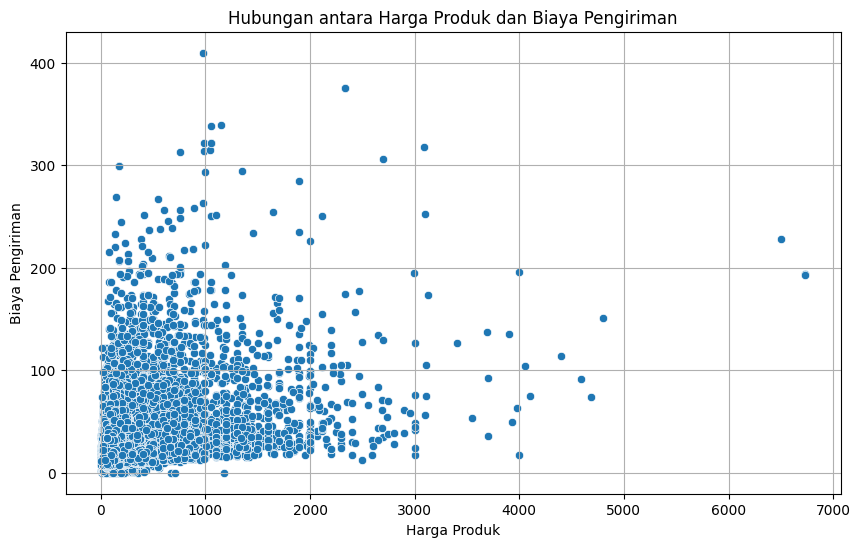

Koefisien Korelasi antara Price dan Freight Value: 0.41


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='freight_value', data=order_items_df)
plt.title('Hubungan antara Harga Produk dan Biaya Pengiriman')
plt.xlabel('Harga Produk')
plt.ylabel('Biaya Pengiriman')
plt.grid(True)
plt.show()
correlation = order_items_df['price'].corr(order_items_df['freight_value'])
print(f'Koefisien Korelasi antara Price dan Freight Value: {correlation:.2f}')

Dapat disimpulkan bahwa tidak ada hubungan yang signifikan antara harga produk dan biaya pengiriman.

### Mengetahui produk yang paling sering dibeli

In [ ]:
#merge dua tabel -> order_items_df dan products_df.
sales_product_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",                 #penggabungan left join
    left_on="product_id",
    right_on="product_id"
)

sales_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [ ]:
#menghitung jumlah pembelian dan total pendapatan untuk setiap produk dalam kategori tertentu.
product_purchase_count = sales_product_df.groupby(['product_id', 'product_category_name']).agg(
    purchase_count=('order_id', 'size'),
    total_revenue=('price', 'sum')
).reset_index()

product_purchase_count.sort_values(by='purchase_count', ascending=False)

,product_id,product_category_name,purchase_count,total_revenue
21724,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,527,37608.90
19394,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,488,43025.56
8456,422879e10f46682990de24d770e7f83d,ferramentas_jardim,484,26577.22
7231,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,392,21440.59
6950,368c6c730842d78016ad823897a372db,ferramentas_jardim,388,21056.80
...,...,...,...,...
13801,6cc77f7f5a82f5afe9ededad3e9d9400,cool_stuff,1,87.89
13799,6cc58e27cae22a37b784841f0e4fb647,fashion_bolsas_e_acessorios,1,24.99
13797,6cc2b92f841b20c5e39281a44a9c68bc,esporte_lazer,1,149.00
13796,6cc0a02127c60fc252540ccd8487763a,instrumentos_musicais,1,41.00


Dapat diketahui bahwa produk yang paling sering dibeli adalah produk id aca2eb7d00ea1a7b8ebd4e68314663af dari kategori moveis decoracao dengan jumlah pembelian 527 kali

### Melihat informasi penjualan berdasarkan kategori produknya

In [ ]:
category_purchase_summary = product_purchase_count.groupby(by="product_category_name")[['purchase_count', 'total_revenue']].sum().reset_index().sort_values(by='purchase_count', ascending=False)
print(category_purchase_summary)

            product_category_name  purchase_count  total_revenue
13                cama_mesa_banho           11115     1036988.68
11                   beleza_saude            9670     1258681.34
32                  esporte_lazer            8641      988048.97
54               moveis_decoracao            8334      729762.49
44         informatica_acessorios            7827      911954.32
..                            ...             ...            ...
17              cds_dvds_musicais              14         730.00
46                     la_cuisine              14        2054.99
60                       pc_gamer               9        1545.95
37  fashion_roupa_infanto_juvenil               8         569.85
67             seguros_e_servicos               2         283.29

[73 rows x 3 columns]


Dapat diketahui bahwa kategori produk yang paling laris adalah cama mesa banho dengan pembelian sebanyak 11115 produk.

In [ ]:
category_purchase_summary = product_purchase_count.groupby(by="product_category_name")[['purchase_count', 'total_revenue']].sum().reset_index().sort_values(by='total_revenue', ascending=False)
print(category_purchase_summary)

            product_category_name  purchase_count  total_revenue
11                   beleza_saude            9670     1258681.34
66             relogios_presentes            5991     1205005.68
13                cama_mesa_banho           11115     1036988.68
32                  esporte_lazer            8641      988048.97
44         informatica_acessorios            7827      911954.32
..                            ...             ...            ...
41                         flores              33        1110.04
15                casa_conforto_2              30         760.27
17              cds_dvds_musicais              14         730.00
37  fashion_roupa_infanto_juvenil               8         569.85
67             seguros_e_servicos               2         283.29

[73 rows x 3 columns]


Dapat diketahui bahwa kategori produk yang menyumbang revenue toko paling banyak adalah baleza_saude yaitu dengan revenue sebesar 1258681.34 USD.

## Eksplorasi data order_payments_df

### Mengetahui metode pembayaran apa saja yang tersedia

In [ ]:
order_payments_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

### Menghitung jumlah order pada masing-masing tipe pembayaran

In [ ]:
order_payments_df.groupby(by="payment_type").order_id.count().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


Dapat diketahui bahwa tipe pembayaran yang paling banyak digunakan adalah credit_card dengan 76795 pesanan dan yang paling sedikit digunakan adalah not_defined dengan 3 pesanan.

### Melihat parameter statistik

In [ ]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Dapat diketahui bahwa rata-rata pelanggan melakukan satu kali pembayaran untuk satu pesanan. selain itu, dapat diketahui pula bahwa rata-rata pelanggan membayar dalam 3 cicilan dan maksimal 24 cicilan, serta rata-rata total pembayaran yang dilakukan pelanggan dalam satu pembayaran adalah 154 USD.

### Mengetahui jumlah cicilan masing-masing pelanggan

In [ ]:
total_installments_per_order = order_payments_df.groupby('order_id')['payment_installments'].sum().reset_index()
print(total_installments_per_order)

                               order_id  payment_installments
0      00010242fe8c5a6d1ba2dd792cb16214                     2
1      00018f77f2f0320c557190d7a144bdd3                     3
2      000229ec398224ef6ca0657da4fc703e                     5
3      00024acbcdf0a6daa1e931b038114c75                     2
4      00042b26cf59d7ce69dfabb4e55b4fd9                     3
...                                 ...                   ...
99435  fffc94f6ce00a00581880bf54a75a037                     1
99436  fffcd46ef2263f404302a634eb57f7eb                     1
99437  fffce4705a9662cd70adb13d4a31832d                     3
99438  fffe18544ffabc95dfada21779c9644f                     3
99439  fffe41c64501cc87c801fd61db3f6244                     1

[99440 rows x 2 columns]


In [ ]:
installment_counts = total_installments_per_order['payment_installments'].value_counts().reset_index()
print(installment_counts)

    payment_installments  count
0                      1  46264
1                      2  13605
2                      3  10709
3                      4   7223
4                      5   5295
5                     10   5224
6                      8   4239
7                      6   3967
8                      7   1689
9                      9    693
10                    12    146
11                    11    129
12                    15     80
13                    13     29
14                    20     29
15                    18     28
16                    16     26
17                    14     23
18                    24     16
19                    17      9
20                    21      5
21                    19      3
22                     0      2
23                    22      2
24                    25      2
25                    23      1
26                    26      1
27                    29      1


Berdasarkan informasi di atas, dapat diketahui bahwa sebagian besar pelanggan (46.264 transaksi) memilih untuk melakukan pembayaran penuh tanpa cicilan (cicilan 1 kali).

### Mengetahui produk yang paling banyak dicicil

In [ ]:
#merge 2 tabel -> order_items_df dan order_payments_df.
installment_product_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="left",                 #penggabungan left join
    left_on="order_id",
    right_on="order_id"
)

installment_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


In [ ]:
#menghitung jumlah pelanggan yang melakukan cicilan untuk setiap produk dan cicilan tertentu
customer_installments_count = installment_product_df.groupby(['product_id', 'payment_installments'])['order_id'].nunique().reset_index()

customer_installments_count.columns = ['product_id', 'payment_installments', 'customer_count']
print(customer_installments_count.sort_values(by='customer_count', ascending=False))

                             product_id  payment_installments  customer_count
37079  aca2eb7d00ea1a7b8ebd4e68314663af                   1.0             298
14328  422879e10f46682990de24d770e7f83d                   1.0             218
12213  389d119b48cf3043d311335e499d9c6b                   1.0             188
11717  368c6c730842d78016ad823897a372db                   1.0             172
18093  53759a2ecddad2bb87a079a1f1519f73                   1.0             159
...                                 ...                   ...             ...
21153  619d2ba7f3d5ad00cbd93ecd49789a44                   2.0               1
21155  619d72a5e53d41d7646274a3fa20c2c4                   2.0               1
21156  619d72a5e53d41d7646274a3fa20c2c4                   3.0               1
21157  619d72a5e53d41d7646274a3fa20c2c4                   4.0               1
55182  fffe9eeff12fcbd74a2f2b007dde0c58                   2.0               1

[55183 rows x 3 columns]


Dapat diketahui bahwa banyak pelanggan yang melakukan cicilan pada produk aca2eb7d00ea1a7b8ebd4e68314663af sebanyak 298 pelanggan.

In [ ]:
print(customer_installments_count.sort_values(by='payment_installments', ascending=False))

                             product_id  payment_installments  customer_count
25105  73fdc89a7474d12e91ebb4a38341fd84                  24.0               1
19306  58efb9b638561ce132216a9a612513e2                  24.0               1
14614  431d674f9a4fbd0957ecf6ba3fcb6899                  24.0               1
27423  7ea0b63dc9b8264702f2d2c1533fb4ae                  24.0               1
28628  8474d936fee23f0c45620cc2022871cc                  24.0               1
...                                 ...                   ...             ...
19655  5a514ce9444538bed304a0607a853c09                   1.0               1
19656  5a57a59c44429be19e1ce8e69e15c473                   1.0               1
15522  473e6d1c85bacb1bc3280dcda0f5321c                   1.0               1
47278  db35a562fb6ba63e19fa42a15349dc04                   0.0               1
2751   0cf573090c66bb30ac5e53c82bdb0403                   0.0               1

[55183 rows x 3 columns]


Berdasarkan hasil yang didapatkan, dapat diketahui bahwa terdapat beberapa produk yang memungkinkan pembayaran dengan cicilan terbanyak hingga 24 kali.

## Eksplorasi data order_reviews_df

### Menghitung seberapa cepat ulasan ditanggapi

In [ ]:
#mengurangi waktu penjawaban ulasan (review_answer_timestamp) dengan waktu pembuatan ulasan (review_creation_date). Hasilnya adalah objek timedelta.
response_time = order_reviews_df["review_answer_timestamp"] - order_reviews_df["review_creation_date"]

#mengonversi timedelta ke detik
response_time = response_time.apply(lambda x: x.total_seconds())

#embagi total detik dengan jumlah detik dalam satu hari (86400 detik).lalu hasilnya dibulatkan ke bilangan bulat terdekat dan disimpan dalam kolom baru "response_time"
order_reviews_df["response_time"] = round(response_time / 86400)

In [ ]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,1.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,1.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,2.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1.0


### Melihat parameter statistik

In [ ]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time
count,99224,99224,99224.000000,11568,40977,99224,99224,99224.000000
unique,98410,98673,NaN,4527,36159,NaN,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN,NaN
freq,3,3,NaN,423,230,NaN,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688,3.213658
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28,0.000000
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872,1.000000
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000,2.000000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000,3.000000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35,519.000000


Dapat diketahui bahwa rata rata score review sebesar 4, dengan nilai score minimal adalah 1 dan nilai score max 5. Selain itu, diketahui pula bahwa rata-rata dalam meresponse review pengguna adalah 3 hari, dengan waktu minimal 0 hari, dan maksimal 519 hari.

## Menggabungkan semua tabel

In [ ]:
#menggabungkan orders_df dengan customers_df
merged_orders_sales = pd.merge(
    left=orders_df,
    right=customers_df,
    how='inner',
    on='customer_id'
)

#menggabungkan order_items_df dengan sellers_df
merge_order_items_sellers = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='inner',
    on='seller_id'
)

#menggabungkan order_items_df dengan products_df
merge_order_items_sellers_products = pd.merge(
    left=merge_order_items_sellers,
    right=products_df,
    how='inner',
    on='product_id'
)

#menggabungkan hasil merge_orders_sales dengan merge_order_items_sellers_products
merged_orders_sales_customers_sellers_products = pd.merge(
    left=merged_orders_sales,
    right=merge_order_items_sellers_products,
    how='inner',
    on='order_id'
)

#menggabungkan hasil di atas dengan installment_product_df
merged_orders_sales_customers_sellers_installment = pd.merge(
    left=merged_orders_sales_customers_sellers_products,
    right=installment_product_df,
    how='inner',
    on='order_id'
)

#menggabungkan hasil di atas dengan order_reviews_df
all_df = pd.merge(
    left=merged_orders_sales_customers_sellers_installment,
    right=order_reviews_df,
    how='inner',
    on='order_id'
)

In [ ]:
print(all_df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id_x', 'product_id_x',
       'seller_id_x', 'shipping_limit_date_x', 'price_x', 'freight_value_x',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_item_id_y', 'product_id_y', 'seller_id_y',
       'shipping_limit_date_y', 'price_y', 'freight_value_y',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_messag

Menghapus duplikasi kolom yang muncul akibat penggabungan kolom

In [ ]:
# Menghapus kolom-kolom duplikat dari penggabungan sebelumnya
all_df_cleaned = all_df.drop(columns=[
    'product_id_y',
    'seller_id_y',
    'shipping_limit_date_y',
    'price_y',
    'freight_value_y',
    'order_item_id_y'
], errors='ignore')

print(all_df_cleaned.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id_x', 'product_id_x',
       'seller_id_x', 'shipping_limit_date_x', 'price_x', 'freight_value_x',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'response_time'],
      dtype='object')


In [ ]:
#mengubah nama kolom yang memiliki akhiran _x menjadi tanpa _x
all_df_cleaned.columns = all_df_cleaned.columns.str.replace('_x$', '', regex=True)
print(all_df_cleaned.columns)


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'response_time'],
      dtype='object')


In [ ]:
all_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159759 entries, 0 to 159758
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       159759 non-null  object        
 1   customer_id                    159759 non-null  object        
 2   order_status                   159759 non-null  object        
 3   order_purchase_timestamp       159759 non-null  object        
 4   order_approved_at              159743 non-null  datetime64[ns]
 5   order_delivered_carrier_date   158700 non-null  datetime64[ns]
 6   order_delivered_customer_date  157392 non-null  datetime64[ns]
 7   order_estimated_delivery_date  159759 non-null  datetime64[ns]
 8   delivery_time                  157391 non-null  float64       
 9   customer_unique_id             159759 non-null  object        
 10  customer_zip_code_prefix       159759 non-null  int64         
 11  

In [ ]:
final_df = all_df_cleaned

## Menyimpan berkas data yang telah dibersihkan menjadi final_df.csv

In [ ]:
# Menyimpan ke CSV
final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/projekai/final_df.csv', index=False)

## Melakukan load final_df.csv kembali untuk dilakukan analisis

In [ ]:
#load data kembali untuk analisis dan build the model
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekai/final_df.csv')

# **Visualization & Explanatory Analysis**

In [ ]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,response_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159759 entries, 0 to 159758
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       159759 non-null  object 
 1   customer_id                    159759 non-null  object 
 2   order_status                   159759 non-null  object 
 3   order_purchase_timestamp       159759 non-null  object 
 4   order_approved_at              159743 non-null  object 
 5   order_delivered_carrier_date   158700 non-null  object 
 6   order_delivered_customer_date  157392 non-null  object 
 7   order_estimated_delivery_date  159759 non-null  object 
 8   delivery_time                  157391 non-null  float64
 9   customer_unique_id             159759 non-null  object 
 10  customer_zip_code_prefix       159759 non-null  int64  
 11  customer_city                  159759 non-null  object 
 12  customer_state                

## Mengetahui distribusi harga produk

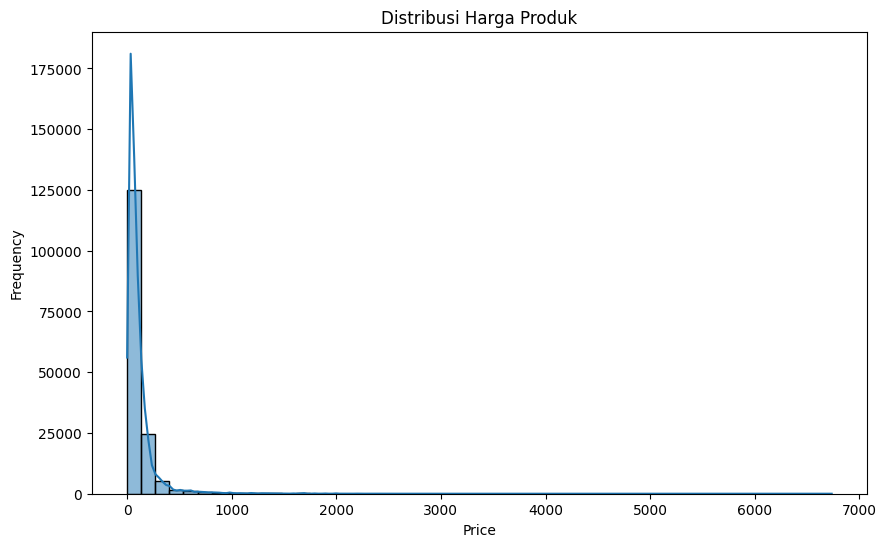

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title("Distribusi Harga Produk")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Grafik distribusi harga produk ini memperlihatkan pola positively skewed (right skewed), di mana sebagian besar produk memiliki harga rendah, dengan puncak frekuensi yang terletak di kisaran harga 0 hingga 500 USD. Pola ini menunjukkan bahwa mayoritas produk dalam dataset dijual dengan harga terjangkau. Namun, terdapat ekor panjang di sisi kanan yang mengindikasikan adanya sejumlah kecil produk dengan harga yang jauh lebih tinggi, mencapai hingga 7.000 USD. Hal ini mengindikasikan bahwa e-commerce ini juga menawarkan produk premium atau barang dengan nilai tinggi, meskipun jumlahnya relatif sedikit. Secara keseluruhan, distribusi harga ini menunjukkan bahwa mayoritas produk dalam platform tersebut berada dalam kategori harga rendah hingga menengah, sementara produk mahal hanya menyumbang sebagian kecil dari keseluruhan penawaran.

## Mengetahui distribusi freight value

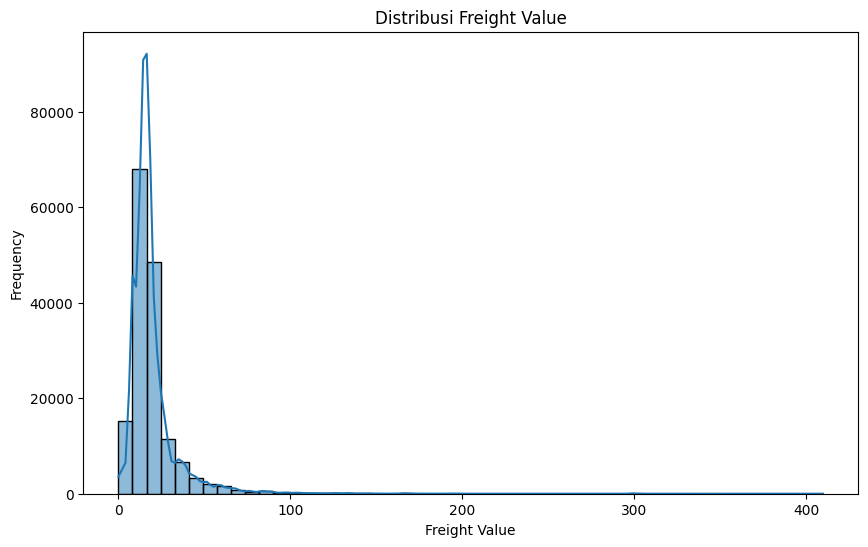

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['freight_value'], bins=50, kde=True)
plt.title("Distribusi Freight Value")
plt.xlabel("Freight Value")
plt.ylabel("Frequency")
plt.show()

Grafik di atas menunjukkan distribusi freight value (biaya pengiriman). Sebagian besar biaya pengiriman berada pada kisaran rendah, yakni antara 0 hingga 50 USD, yang terlihat dari puncak frekuensi pada rentang tersebut. Distribusi ini memiliki pola positively skewed (right skewed), dengan ekor yang memanjang ke kanan, menunjukkan adanya sejumlah kecil data dengan biaya pengiriman yang jauh lebih tinggi, mencapai hingga 400 USD. Nilai freight yang tinggi kemungkinan berkaitan dengan pengiriman produk yang lebih besar, lebih berat, atau pengiriman ke lokasi yang lebih jauh. Pola distribusi ini memberikan wawasan bahwa sebagian besar pengiriman di e-commerce ini memiliki biaya yang relatif terjangkau, sementara biaya tinggi hanya terjadi pada kasus tertentu.



## Mengetahui distribusi rating produk

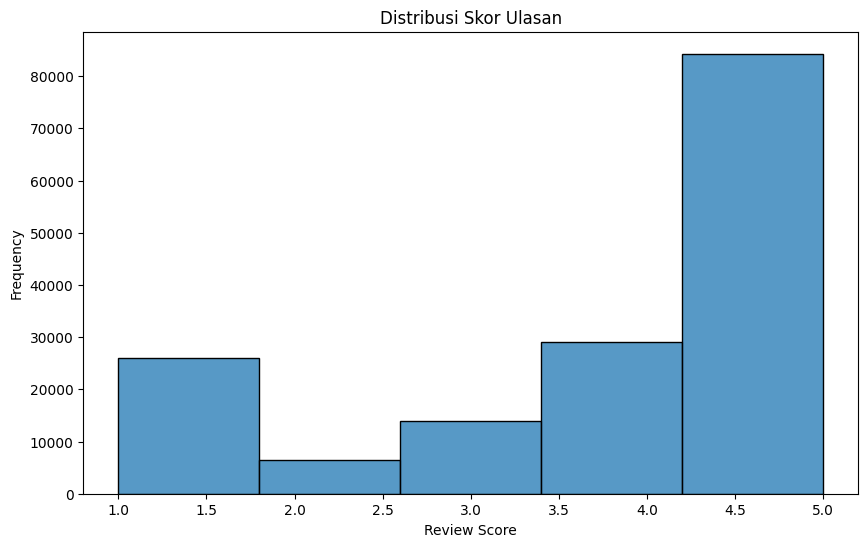

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['review_score'], bins=5, kde=False)
plt.title("Distribusi Skor Ulasan")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

Grafik distribusi skor ulasan diatas menggambarkan sebaran frekuensi dari berbagai skor yang diberikan oleh pengguna terhadap suatu produk. Dalam grafik ini, sumbu x mewakili skor ulasan, sementara sumbu y menunjukkan jumlah atau frekuensi ulasan dengan skor tersebut. Berdasarkan grafik diatas, terlihat bahwa mayoritas pengguna memberikan skor 5 (skor tertinggi). Hal ini mengindikasikan bahwa sebagian besar pengguna merasa sangat puas dengan produk atau layanan yang mereka nilai. Jumlah ulasan dengan skor 4 juga cukup signifikan, menunjukkan tingkat kepuasan yang tinggi secara keseluruhan. Semakin ke kanan pada sumbu x, frekuensi ulasan semakin menurun. Artinya, semakin rendah skornya, semakin sedikit pula jumlah pengguna yang memberikan penilaian tersebut. Ini menunjukkan bahwa tingkat ketidakpuasan atau pengalaman negatif yang dialami pengguna relatif lebih sedikit. Secara keseluruhan, distribusi skor ulasan ini memberikan gambaran positif tentang persepsi pengguna terhadap produk atau layanan yang dinilai.

## Mengetahui korelasi antar kolom

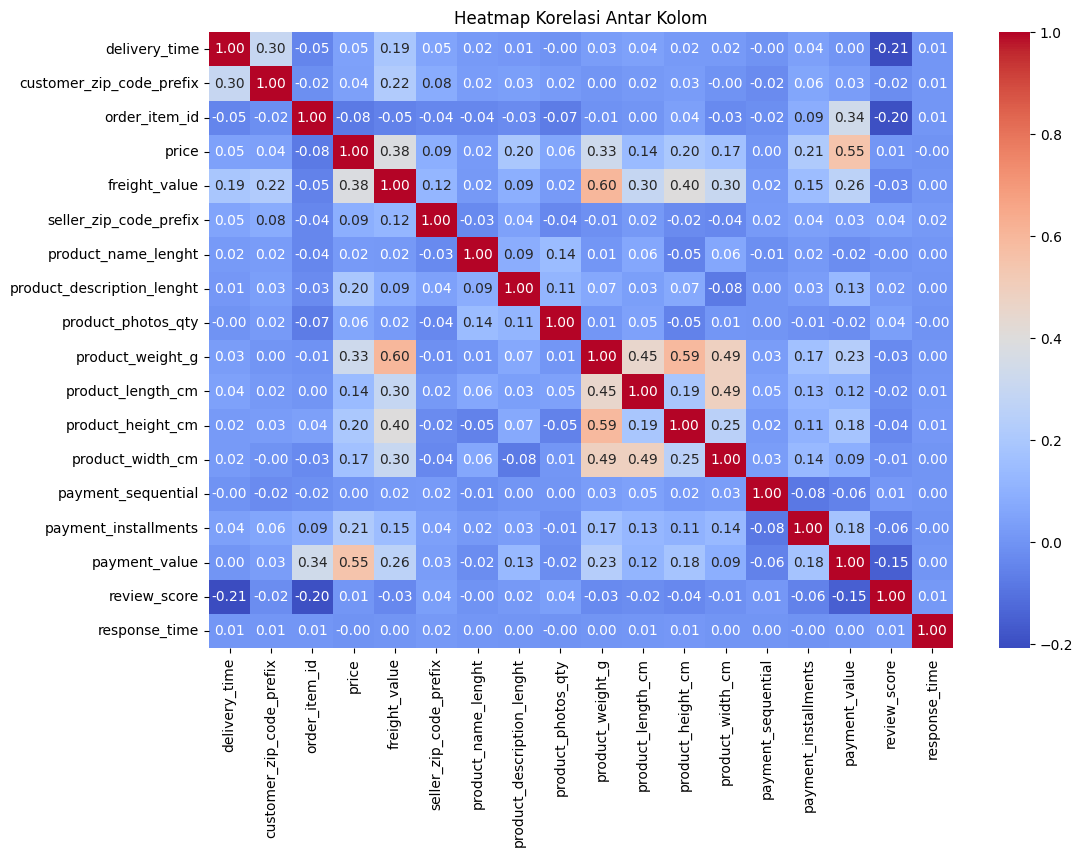

In [ ]:
numeric_df = data.select_dtypes(include=['number'])

#korelasi antar kolom numerik
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Kolom")
plt.show()

Heatmap korelasi di atas mengungkapkan hubungan antar variabel dalam dataset dan memberikan wawasan mengenai keterkaitan antara berbagai faktor. Salah satu korelasi tertinggi terlihat pada dimensi produk, yaitu antara product_length_cm dan product_height_cm yang memiliki korelasi sekitar 0,60, serta antara product_length_cm dan product_width_cm dengan korelasi sekitar 0,49–0,50. Hal ini menunjukkan bahwa dimensi produk seperti panjang, tinggi, dan lebar cenderung saling berhubungan secara linier. Artinya, produk yang lebih panjang kemungkinan juga lebih tinggi atau lebih lebar. Korelasi ini wajar karena dimensi produk umumnya proporsional satu sama lain. Selain itu, terdapat korelasi positif yang cukup tinggi antara freight_value dan price (0,38), yang mengindikasikan bahwa produk dengan harga lebih tinggi cenderung memiliki biaya pengiriman yang lebih besar. Sementara itu, delivery_time tidak menunjukkan korelasi yang signifikan dengan variabel lainnya, kecuali sedikit korelasi negatif dengan customer_zip_code_prefix (-0,30), yang mungkin mencerminkan faktor geografis dalam pengiriman. Korelasi negatif yang lemah antara review_score dan response_time (-0,21) menunjukkan bahwa waktu respons yang lebih lama dapat sedikit mempengaruhi skor ulasan pelanggan. Secara keseluruhan, heatmap ini memberikan gambaran awal mengenai hubungan antar variabel yang dapat digunakan untuk analisis lebih lanjut atau untuk membangun model prediktif.

## Bagaimana tren penjualan (sales) dan pendapatan (revenue) perusahaan dalam beberapa bulan terakhir?

### Mengubah frekuensi data untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh setiap bulannya

In [ ]:
#jumlah order dan total revenue per bulan
monthly_orders_df = final_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})

#mengubah format jadi YYYY-MM
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_approved_at": "order_date",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

print(monthly_orders_df)

<ipython-input-109-63a8c25c7011>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = final_df.resample(rule='M', on='order_approved_at').agg({


   order_date  order_count     revenue
0     2016-09            1      404.91
1     2016-10          290    59521.85
2     2016-11            0        0.00
3     2016-12            1       10.90
4     2017-01          731   164440.31
5     2017-02         1644   294653.56
6     2017-03         2554   458793.29
7     2017-04         2272   436739.22
8     2017-05         3527   645128.70
9     2017-06         3136   526949.56
10    2017-07         3818   641418.36
11    2017-08         4201   723255.14
12    2017-09         4154   818372.84
13    2017-10         4424   967857.93
14    2017-11         7118  1337354.41
15    2017-12         5590   916550.13
16    2018-01         6870  1187530.04
17    2018-02         6444  1111957.83
18    2018-03         7066  1261805.21
19    2018-04         6639  1262058.79
20    2018-05         6953  1346335.93
21    2018-06         6096  1140739.25
22    2018-07         6042  1102128.58
23    2018-08         6523  1091610.74
24    2018-09            

### Memvisualkan informasi terkait jumlah order dan total revenue yang diperoleh tiap bulan.

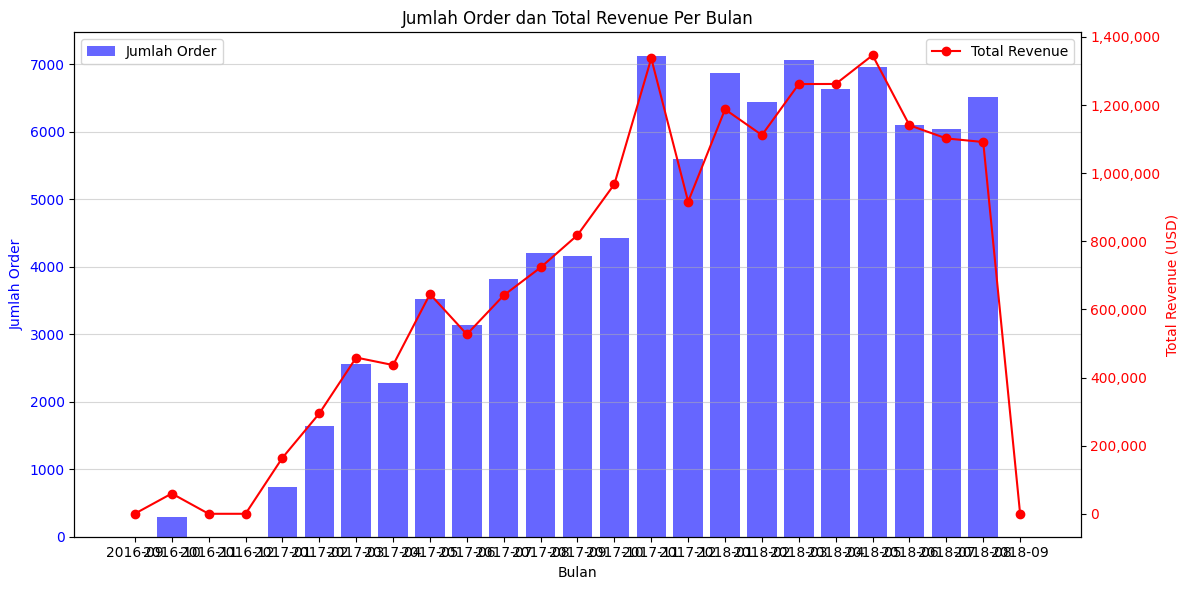

In [ ]:
import matplotlib.ticker as mticker
fig, ax1 = plt.subplots(figsize=(12, 6))

#untuk jumlah order
ax1.bar(monthly_orders_df['order_date'], monthly_orders_df['order_count'], color='b', alpha=0.6, label='Jumlah Order')
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Jumlah Order', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Jumlah Order dan Total Revenue Per Bulan')

#untuk revenue
ax2 = ax1.twinx()
ax2.plot(monthly_orders_df['order_date'], monthly_orders_df['revenue'], color='r', marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue (USD)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

ax1.grid(axis='y', alpha=0.5)

#legend
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()

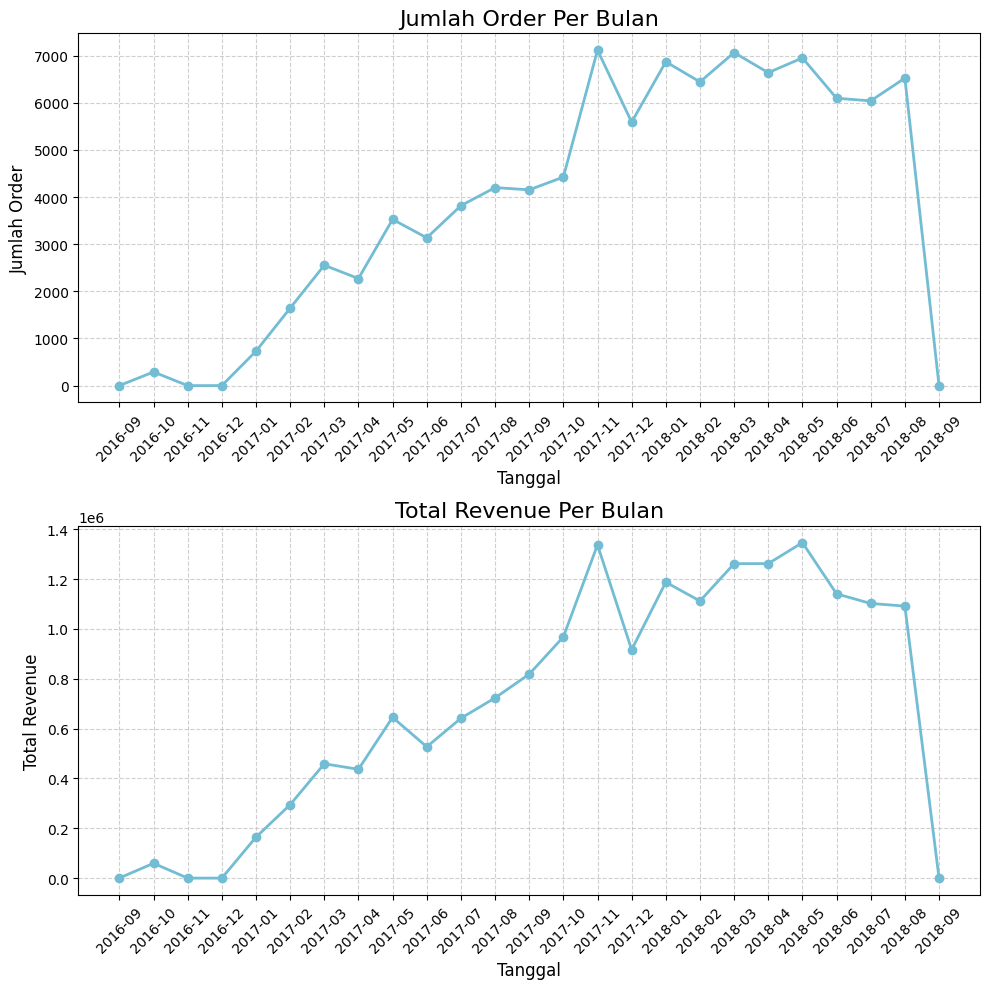

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

#Jumlah Order per Bulan
ax1.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
ax1.set_title("Jumlah Order Per Bulan", fontsize=16)
ax1.set_xlabel("Tanggal", fontsize=12)
ax1.set_ylabel("Jumlah Order", fontsize=12)
ax1.tick_params(axis='x', labelrotation=45)
ax1.grid(True, linestyle='--', alpha=0.6)

#Total Revenue per Bulan
ax2.plot(monthly_orders_df["order_date"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#72BCD4")
ax2.set_title("Total Revenue Per Bulan", fontsize=16)
ax2.set_xlabel("Tanggal", fontsize=12)
ax2.set_ylabel("Total Revenue", fontsize=12)
ax2.tick_params(axis='x', labelrotation=45)
ax2.grid(True, linestyle='--', alpha=0.6)

plt.subplots_adjust(hspace=1.5)

plt.tight_layout()
plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa total order dan revenue tertinggi yang didapat selama perusahaan ini beroperasi adalah pada bulan November 2017.

### Mengetahui jumlah order dan revenue pada tahun 2016

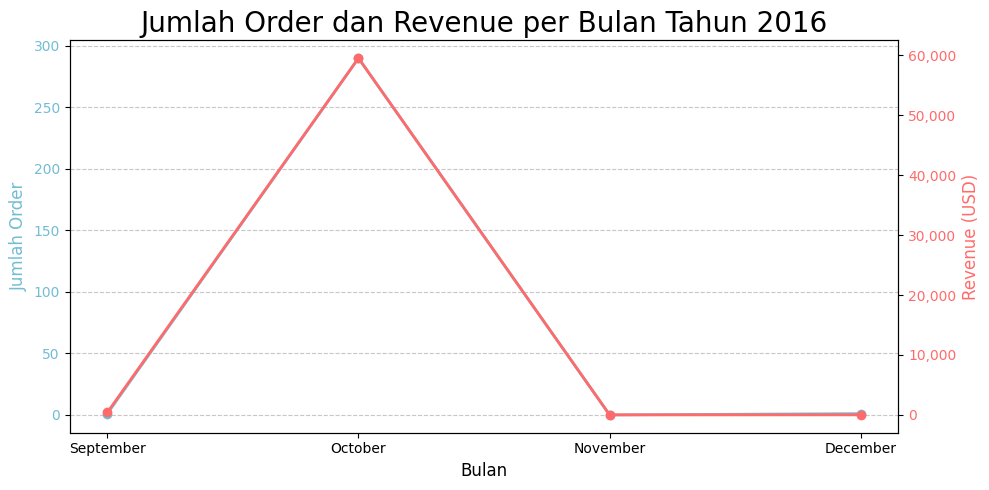

In [ ]:
monthly_orders_df['order_date'] = pd.to_datetime(monthly_orders_df['order_date'], errors='coerce')
monthly_orders_2016_df = monthly_orders_df[monthly_orders_df['order_date'].dt.year == 2016]

fig, ax1 = plt.subplots(figsize=(10, 5))

#jumlah order
ax1.plot(monthly_orders_2016_df['order_date'].dt.strftime('%B'),
         monthly_orders_2016_df['order_count'],
         marker='o', linewidth=2, color="#72BCD4", label="Jumlah Order")
ax1.set_xlabel("Bulan", fontsize=12)
ax1.set_ylabel("Jumlah Order", fontsize=12, color="#72BCD4")
ax1.tick_params(axis='y', labelcolor="#72BCD4")
ax1.set_title("Jumlah Order dan Revenue per Bulan Tahun 2016", loc="center", fontsize=20)

#revenue
ax2 = ax1.twinx()
ax2.plot(monthly_orders_2016_df['order_date'].dt.strftime('%B'),
         monthly_orders_2016_df['revenue'],
         marker='o', linewidth=2, color="#FF6B6B", label="Revenue")
ax2.set_ylabel("Revenue (USD)", fontsize=12, color="#FF6B6B")
ax2.tick_params(axis='y', labelcolor="#FF6B6B")
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa penjualan tertinggi pada tahun 2016 terletak pada bulan Oktober dengan total order hampir mencapai 300 pesanan dan revenue hampir mencapai 60000 USD. Selain itu, dapat diketahui pula bahwa pada bulan November hingga Desember tidak terdapat pemesanan dan pemasukan.

### Mengetahui jumlah order dan revenue pada tahun 2017

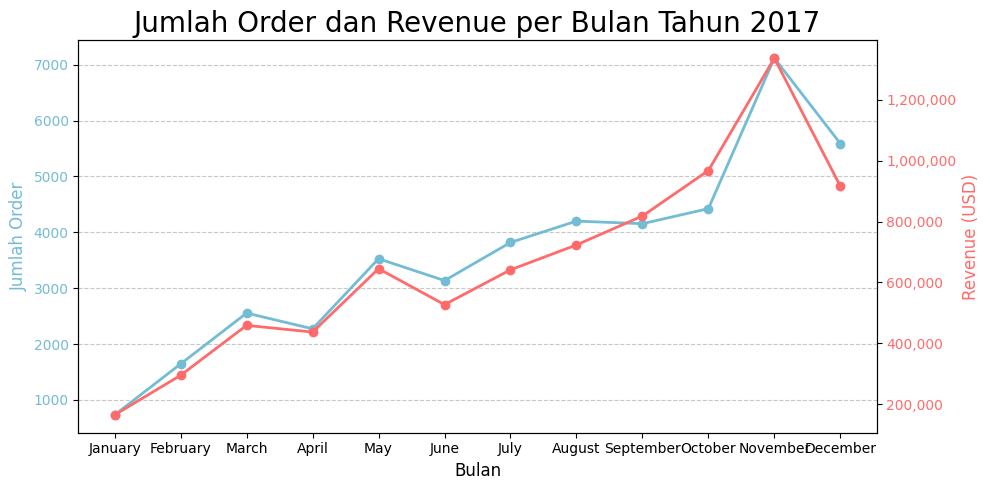

In [ ]:
monthly_orders_2017_df = monthly_orders_df[monthly_orders_df['order_date'].dt.year == 2017]

fig, ax1 = plt.subplots(figsize=(10, 5))

#jumlah order
ax1.plot(monthly_orders_2017_df['order_date'].dt.strftime('%B'),
         monthly_orders_2017_df['order_count'],
         marker='o', linewidth=2, color="#72BCD4", label="Jumlah Order")
ax1.set_xlabel("Bulan", fontsize=12)
ax1.set_ylabel("Jumlah Order", fontsize=12, color="#72BCD4")
ax1.tick_params(axis='y', labelcolor="#72BCD4")
ax1.set_title("Jumlah Order dan Revenue per Bulan Tahun 2017", loc="center", fontsize=20)

#revenue
ax2 = ax1.twinx()
ax2.plot(monthly_orders_2017_df['order_date'].dt.strftime('%B'),
         monthly_orders_2017_df['revenue'],
         marker='o', linewidth=2, color="#FF6B6B", label="Revenue")
ax2.set_ylabel("Revenue (USD)", fontsize=12, color="#FF6B6B")
ax2.tick_params(axis='y', labelcolor="#FF6B6B")
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa penjualan tertinggi pada tahun 2017 terletak pada bulan November dengan total order mencapai lebih dari 7000 pesanan dan revenue mencapai lebih dari 1500000 USD. Pada tahun 2017, jumlah order dan revenue mengalami peningkatan yang signifikan, tetapi pada bulan Desember mengalami penurunan.

### Mengetahui jumlah order dan revenue pada tahun 2018

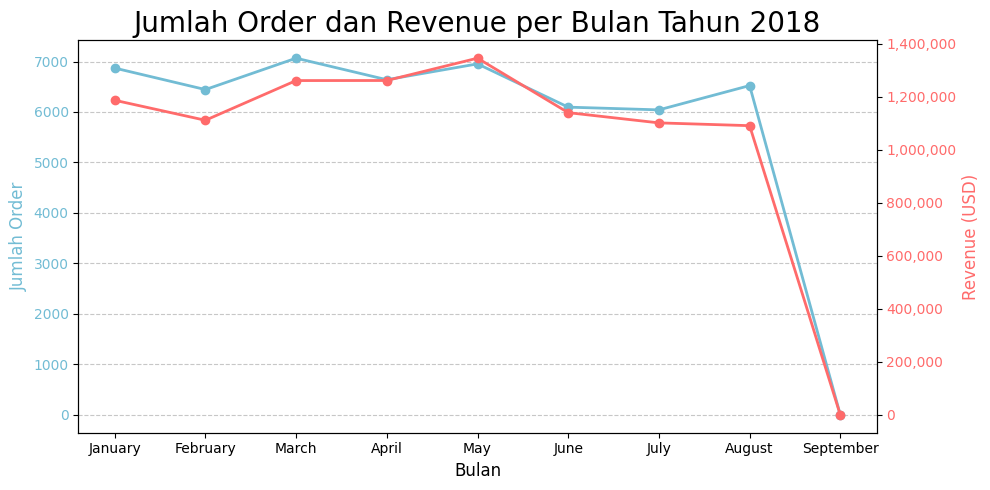

In [ ]:
monthly_orders_2018_df = monthly_orders_df[monthly_orders_df['order_date'].dt.year == 2018]

fig, ax1 = plt.subplots(figsize=(10, 5))

#jumlah order
ax1.plot(monthly_orders_2018_df['order_date'].dt.strftime('%B'),
         monthly_orders_2018_df['order_count'],
         marker='o', linewidth=2, color="#72BCD4", label="Jumlah Order")
ax1.set_xlabel("Bulan", fontsize=12)
ax1.set_ylabel("Jumlah Order", fontsize=12, color="#72BCD4")
ax1.tick_params(axis='y', labelcolor="#72BCD4")
ax1.set_title("Jumlah Order dan Revenue per Bulan Tahun 2018", loc="center", fontsize=20)

#revenue
ax2 = ax1.twinx()
ax2.plot(monthly_orders_2018_df['order_date'].dt.strftime('%B'),
         monthly_orders_2018_df['revenue'],
         marker='o', linewidth=2, color="#FF6B6B", label="Revenue")
ax2.set_ylabel("Revenue (USD)", fontsize=12, color="#FF6B6B")
ax2.tick_params(axis='y', labelcolor="#FF6B6B")
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

Berdasarkan informasi di atas, dapat diketahui bahwa penjualan tertinggi pada tahun 2018 terletak pada bulan May dengan total order mencapai 7000 pesanan dan revenue mencapai lebih dari 1300000 USD. Pada tahun 2018 terdapat penurunan profit yang signifikan yang terjadi pada bulan September.

### Mengetahui jumlah order dan total revenue per tahun

In [ ]:
yearly_orders_df = final_df.resample(rule='A', on='order_approved_at').agg({
    "order_id": "nunique",
    "price": "sum"
})

#mengubah jadi format YYYY
yearly_orders_df.index = yearly_orders_df.index.strftime('%Y')
yearly_orders_df = yearly_orders_df.reset_index()

yearly_orders_df.rename(columns={
    "order_approved_at": "order_year",
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

print(yearly_orders_df)

<ipython-input-115-d5a5d93ce82c>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_orders_df = final_df.resample(rule='A', on='order_approved_at').agg({


  order_year  order_count     revenue
0       2016          292    59937.66
1       2017        43169  7931513.45
2       2018        52634  9504311.37


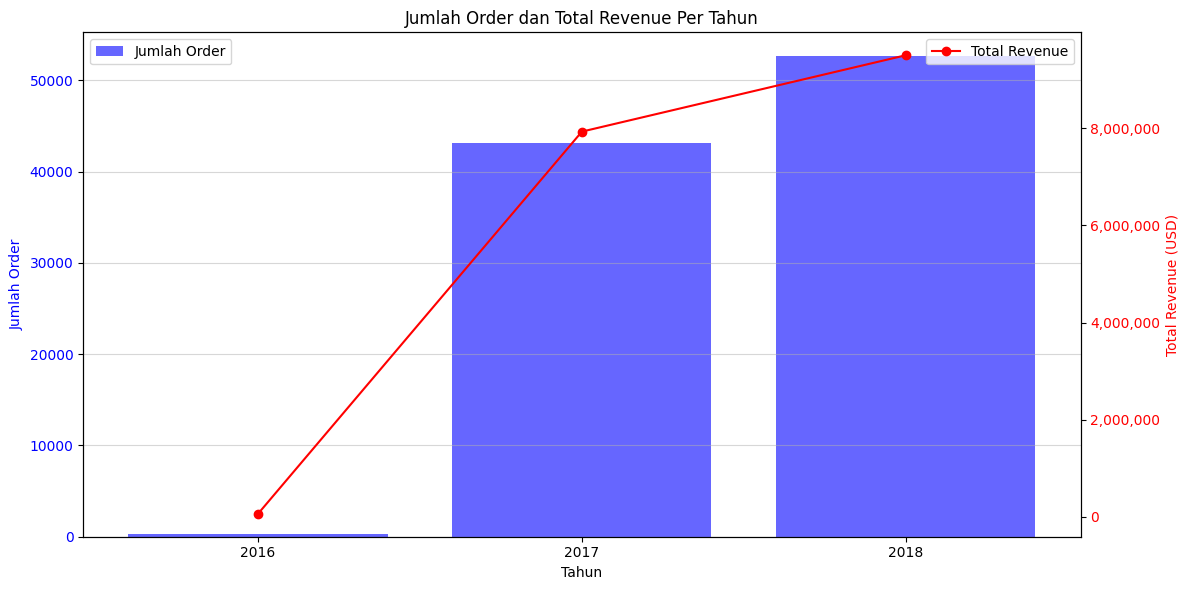

In [ ]:
import matplotlib.ticker as mticker
fig, ax1 = plt.subplots(figsize=(12, 6))

#jumlah order
ax1.bar(yearly_orders_df['order_year'], yearly_orders_df['order_count'], color='b', alpha=0.6, label='Jumlah Order')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('Jumlah Order', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Jumlah Order dan Total Revenue Per Tahun')

#revenue
ax2 = ax1.twinx()
ax2.plot(yearly_orders_df['order_year'], yearly_orders_df['revenue'], color='r', marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue (USD)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

ax1.grid(axis='y', alpha=0.5)

#legend
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa terjadi kenaikan yang signifikan dalam jumlah order dan total revenue dari tahun 2016 hingga 2018. Hal ini menunjukkan adanya peningkatan dalam aktivitas penjualan dari tahun ke tahun. Pada tahun 2016, jumlah order dan revenue tampak sangat rendah. Ini bisa menunjukkan bahwa aktivitas bisnis e-commerce ini mungkin baru dimulai atau masih dalam tahap pengembangan pada tahun tersebut. Pada tahun 2017, terdapat peningkatan yang cukup besar dibandingkan tahun 2016 baik dalam jumlah order maupun revenue. Tren ini berlanjut hingga tahun 2018, yang juga menunjukkan peningkatan lebih tinggi. Total revenue tampak meningkat seiring bertambahnya jumlah order, menunjukkan bahwa kenaikan order berdampak langsung pada peningkatan pendapatan.

## Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

### Membuat tabel informasi terkait jumlah penjualan tiap produk

In [ ]:
sum_product_purchase_df = final_df.groupby(['product_id', 'product_category_name']).agg(
    purchase_count=('order_id', 'size')
).reset_index()

print(sum_product_purchase_df.head(10))

                         product_id  product_category_name  purchase_count
0  00066f42aeeb9f3007548bb9d3f33c38             perfumaria               1
1  00088930e925c41fd95ebfe695fd2655             automotivo               1
2  0009406fd7479715e4bef61dd91f2462        cama_mesa_banho               1
3  000b8f95fcb9e0096488278317764d19  utilidades_domesticas               2
4  000d9be29b5207b54e86aa1b1ac54872     relogios_presentes               1
5  0011c512eb256aa0dbbb544d8dffcf6e             automotivo               4
6  00126f27c813603687e6ce486d909d01             cool_stuff               2
7  001795ec6f1b187d37335e1c4704762e         consoles_games              13
8  001b237c0e9bb435f2e54071129237e9        cama_mesa_banho               1
9  001b72dfd63e9833e8c02742adf472e3       moveis_decoracao              19


### Mengetahui produk yang paling sering dibeli

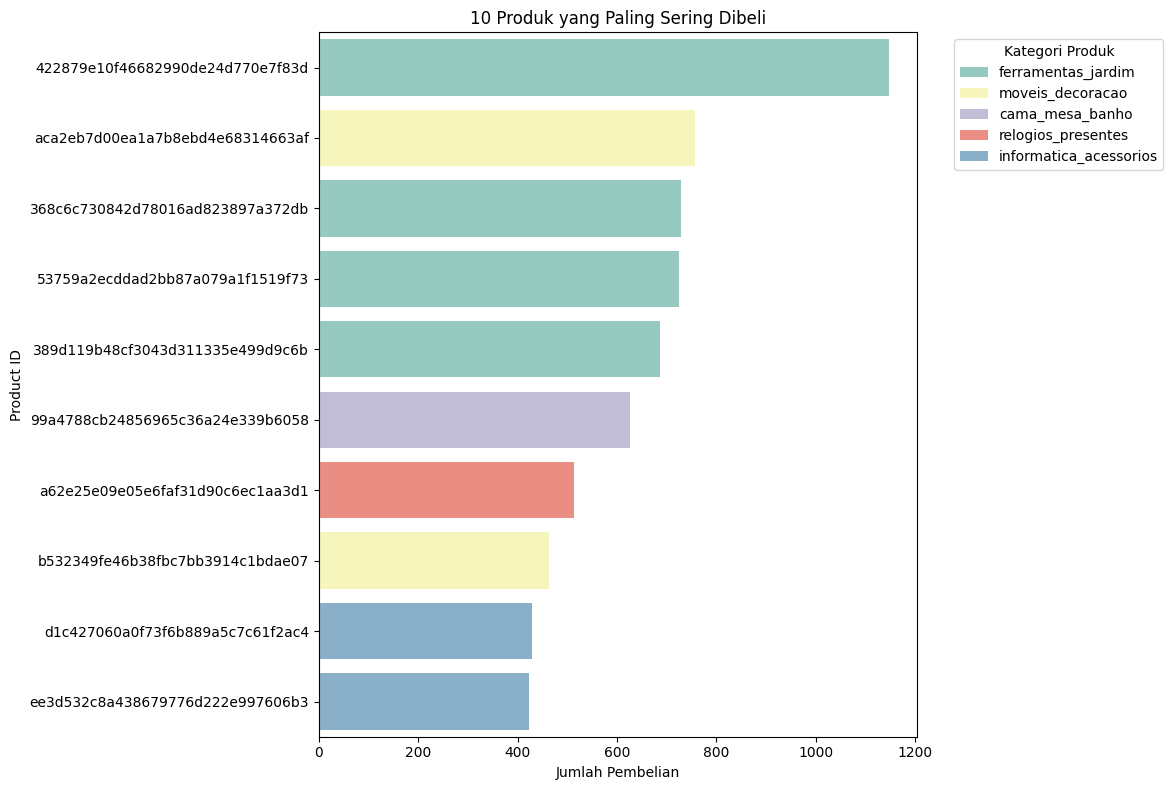

In [ ]:
all_categories = final_df['product_category_name'].unique()

top_products = sum_product_purchase_df.sort_values(by='purchase_count', ascending=False).head(10)
unique_categories = top_products['product_category_name'].unique()
num_categories = len(unique_categories)
palette = sns.color_palette("Set3", num_categories)
category_colors = dict(zip(unique_categories, palette))


plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_products,
    x='purchase_count',
    y='product_id',
    hue='product_category_name',
    palette=category_colors,
    dodge=False
)
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Product ID')
plt.title('10 Produk yang Paling Sering Dibeli')
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa produk yang paling sering dibeli adalah produk 422879e10f46682990de24d770e7f83d dari kategori produk ferramentas_jardim dengan jumlah pembelian mencapai lebih dari 1000 pemesanan.

### Mengetahui produk yang paling jarang dibeli

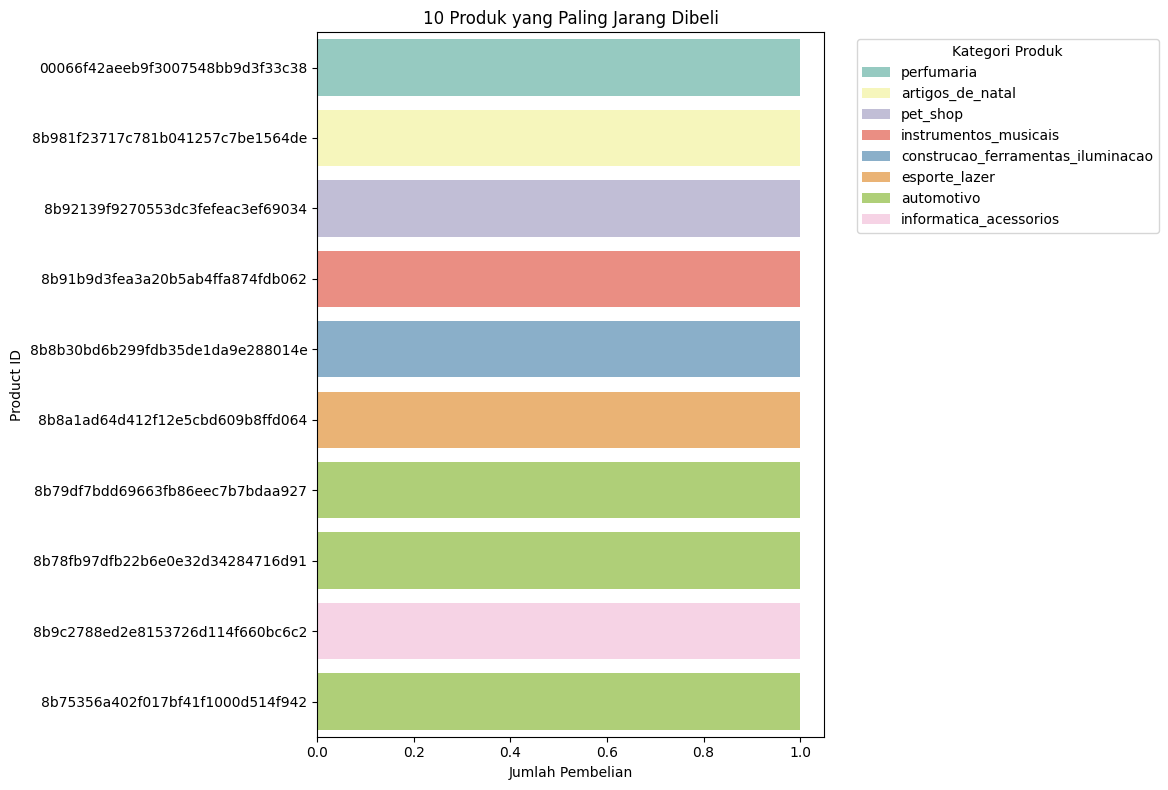

In [ ]:
low_products = sum_product_purchase_df.sort_values(by='purchase_count', ascending=True).head(10)

unique_categories = low_products['product_category_name'].unique()
num_categories = len(unique_categories)
palette = sns.color_palette("Set3", num_categories)
category_colors = dict(zip(unique_categories, palette))

plt.figure(figsize=(12, 8))
sns.barplot(
    data=low_products,
    x='purchase_count',
    y='product_id',
    hue='product_category_name',
    palette=category_colors,
    dodge=False
)
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Product ID')
plt.title('10 Produk yang Paling Jarang Dibeli')
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa terdapat 10 produk yang jarang dibeli dengan jumlah pembelian hanya sebanyak 1 pemesanan.

### Mengetahui kategori produk yang paling sering dibeli

In [ ]:
category_purchase_count = final_df.groupby(['product_category_name']).agg(
    purchase_count=('order_id', 'size')
).reset_index()

category_purchase_count.sort_values(by='purchase_count', ascending=False, inplace=True)

<ipython-input-121-a2daaafcaf7d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


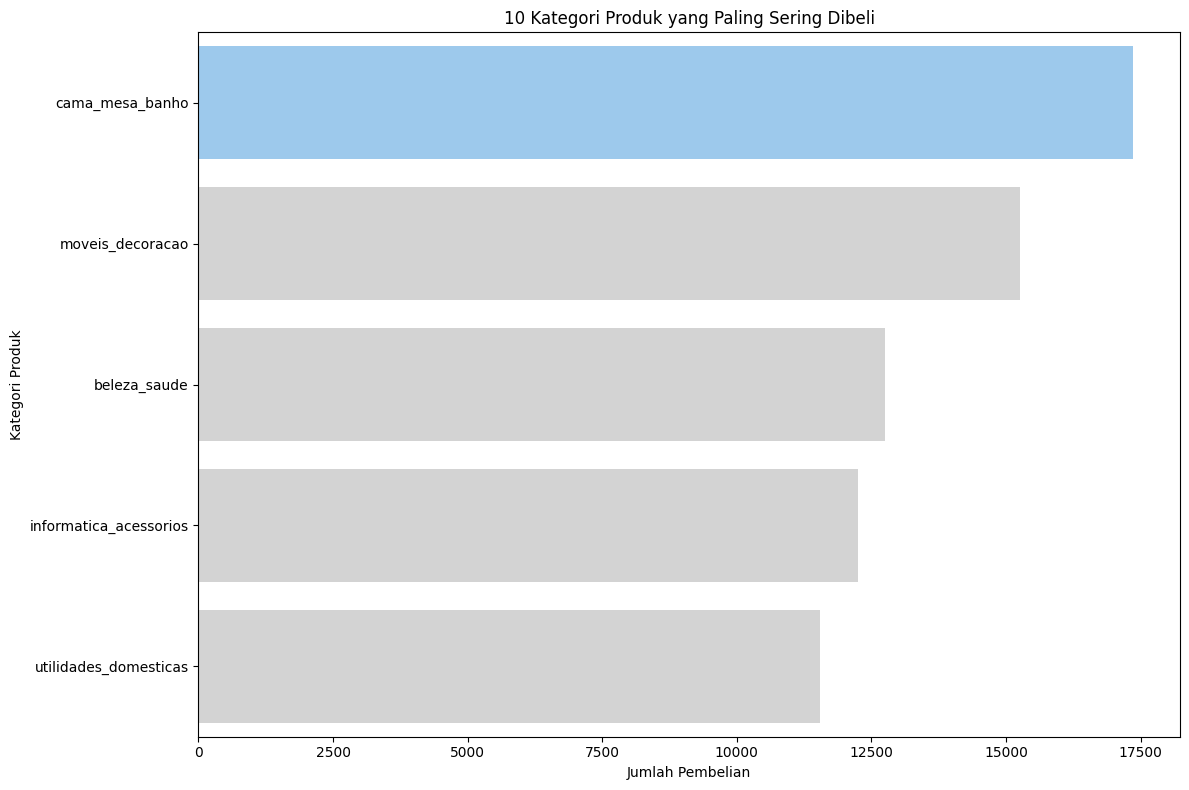

In [ ]:
top_categories = category_purchase_count.sort_values(by='purchase_count', ascending=False).head(5)

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_categories,
    x='purchase_count',
    y='product_category_name',
    palette=colors
)
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Kategori Produk')
plt.title('10 Kategori Produk yang Paling Sering Dibeli')
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa kategori produk yang memiliki jumlah pembelian terbanyak adalah kategori cama_mesa_banha dengan jumlah pembelian mencapai lebih dari 16000 pemesanan.

### Mengetahui kategori produk yang paling jarang dibeli

<ipython-input-122-c547b6f5a1cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


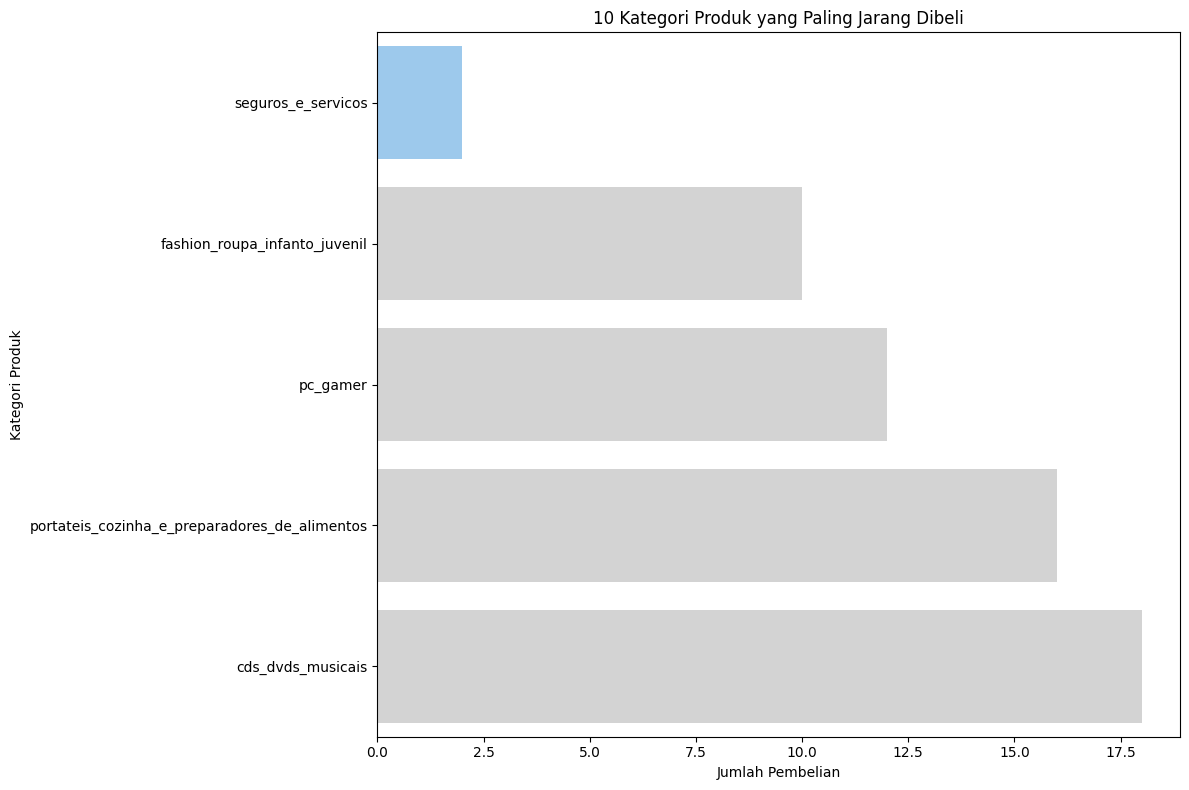

In [ ]:
low_categories = category_purchase_count.sort_values(by='purchase_count', ascending=True).head(5)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=low_categories,
    x='purchase_count',
    y='product_category_name',
    palette=colors
)
plt.xlabel('Jumlah Pembelian')
plt.ylabel('Kategori Produk')
plt.title('10 Kategori Produk yang Paling Jarang Dibeli')
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa kategori produk yang memiliki jumlah pembelian paling sedikit adalah kategori seguros_e_servicos dengan jumlah pembelian hanya mencapai 2 pemesanan.

### Bagaimana Demografi Pelanggan yang Dimiliki?

<ipython-input-123-633172f1ec22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


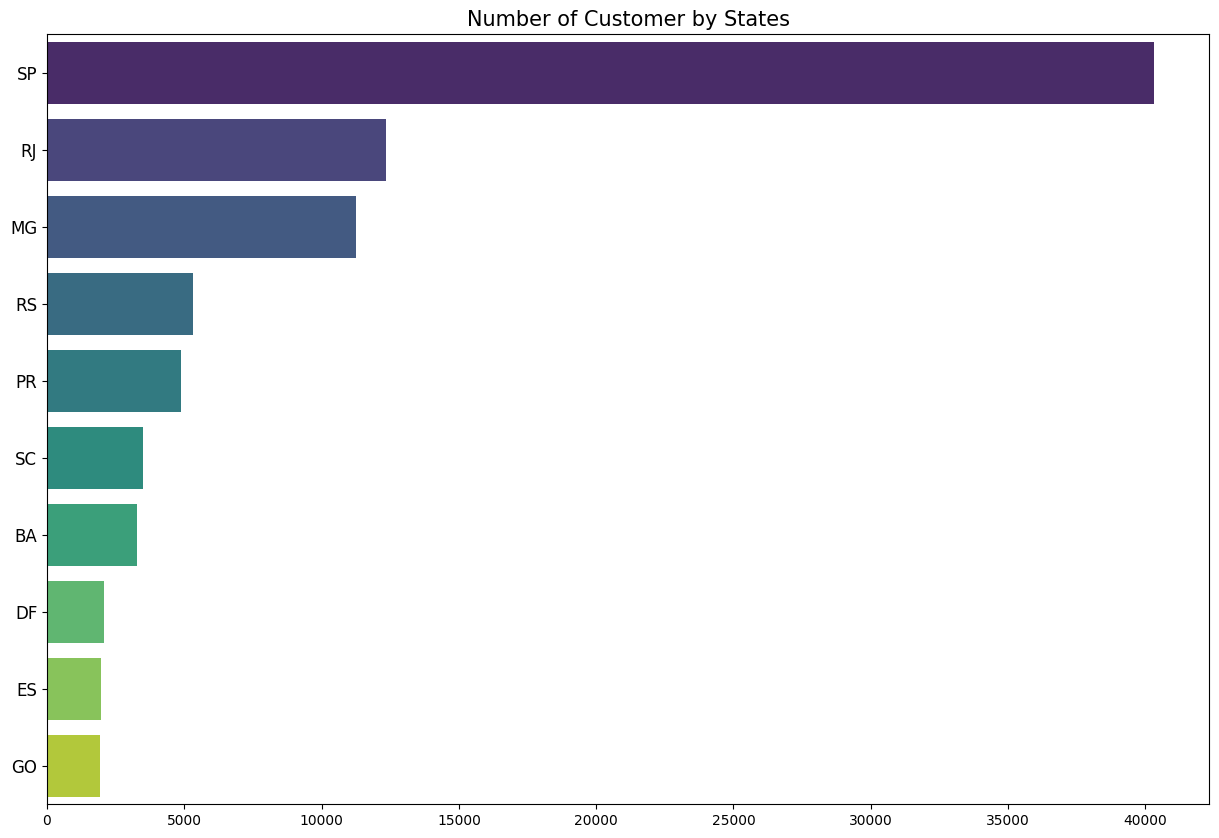

In [ ]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()

bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(15, 10))
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
    palette="viridis"
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa jumlah pelanggan terbanyak berasal dari kota SP dengan jumlah pelanggam mencapai lebih dari 40000 pelanggan.

## RVM Analysis

## Kapan terakhir kali pelanggan melakukan transaksi?

In [ ]:
rfm_df = final_df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max",
    "order_id": "nunique",
    "price": "sum"
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

#mengambil tanggal terbaru sebagai referensi untuk menghitung recency
recent_date = final_df["order_approved_at"].max()

#mnghitung nilai recency dalam hari
rfm_df["recency"] = (recent_date - rfm_df["max_order_timestamp"]).dt.days

#menghapus kolom max_order_timestamp karena sudah tidak diperlukan
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.sort_values(by="recency", ascending=True).head()

,customer_id,frequency,monetary,recency
28336,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,0.0
74186,c4c66f47534e09a03fc7a878a9eda5ea,1,65.00,5.0
85866,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,5.0
51580,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,5.0
41244,6e353700bc7bcdf6ebc15d6de16d7002,1,45.90,5.0


Jika hari ini adalah Hari ke-0, maka transaksi terakhir pelanggan tersebut dapat dihitung dengan mengurangi nilai pada kolom "recency" dari hari ini. Berdasarkan data di atas, pelanggan dengan customer_id 28336 memiliki recency 0.0, artinya pelanggan ini melakukan transaksi terakhir pada hari ini. Pelanggan lainnya (customer_id 74186, 85866, 51580, dan 41244) memiliki recency 5.0, yang berarti mereka terakhir kali melakukan transaksi 5 hari yang lalu. Pelanggan yang terakhir kali melakukan transaksi adalah customer_id 28336 yang transaksinya terjadi pada hari ini (recency = 0).

## Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

In [ ]:
rfm_df.sort_values(by="frequency", ascending=False).head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.8,293.0
64069,aa593292dfbb072469d56ee43ef2b160,1,323.1,538.0
64078,aa5e567592c7fce76e3937e35c6a4ecb,1,89.0,265.0
64077,aa5e341090958e5111abe3ba75bcfe87,1,82.0,171.0
64076,aa5e0a0c36015d39de864189a2b00b09,1,76.0,19.0


Berdasarkan data di atas, kolom frequency menunjukkan jumlah total transaksi yang dilakukan oleh masing-masing pelanggan selama periode tertentu. Data ini menunjukkan bahwa setiap pelanggan dalam pelanggan hanya melakukan satu transaksi dalam beberapa bulan terakhir, dengan waktu transaksi yang berbeda-beda. Tidak ada pelanggan yang bertransaksi berulang kali dalam periode yang dicatat, sehingga frekuensi pembelian mereka rendah, dengan rata-rata hanya satu kali transaksi per pelanggan.

## Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

In [ ]:
rfm_df.sort_values(by="monetary", ascending=False).head()

,customer_id,frequency,monetary,recency
8288,1617b1357756262bfa56ab541c47bc16,1,107520.0,336.0
71673,be1b70680b9f9694d8c70f41fa3dc92b,1,40000.0,191.0
2003,05455dfa7cd02f13d132aa7a6a9729c6,1,35607.6,279.0
88917,ec5b2ba62e574342386871631fafd3fc,1,28640.0,48.0
12033,1ff773612ab8934db89fd5afa8afe506,1,28499.0,136.0


Dari data di atas, kolom monetary menunjukkan jumlah uang yang dihabiskan oleh setiap pelanggan dalam transaksi terakhirnya selama beberapa bulan terakhir. Pelanggan dengan customer_id 1617b1357756262bfa56ab541c47bc16 menghabiskan total 107,520 dalam satu transaksi, yang merupakan jumlah tertinggi di antara pelanggan yang tercantum. Pelanggan lainnya, seperti be1b70680b9f9694d8c70f41fa3dc92b dan 05455dfa7cd02f13d132aa7a6a9729c6, menghabiskan masing-masing sebesar 40,000 dan 35,607.6 dalam transaksi terakhir mereka. Selain itu, customer_id ec5b2ba62e574342386871631fafd3fc dan 1ff773612ab8934db89fd5afa8afe506 masing-masing menghabiskan 28,640 dan 28,499. Para pelanggan dalam tabel ini melakukan satu transaksi dalam beberapa bulan terakhir dengan pengeluaran yang cukup besar, menunjukkan adanya transaksi bernilai tinggi. Ini bisa menunjukkan tingginya daya beli atau besarnya nilai produk/jasa yang dibeli oleh pelanggan-pelanggan ini dalam beberapa bulan terakhir.

### Mengidentifikasi best customer berdasarkan parameter frequency, monetary, dan recancy

<ipython-input-127-5a7ff4ce81ad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-127-5a7ff4ce81ad>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-127-5a7ff4ce81ad>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

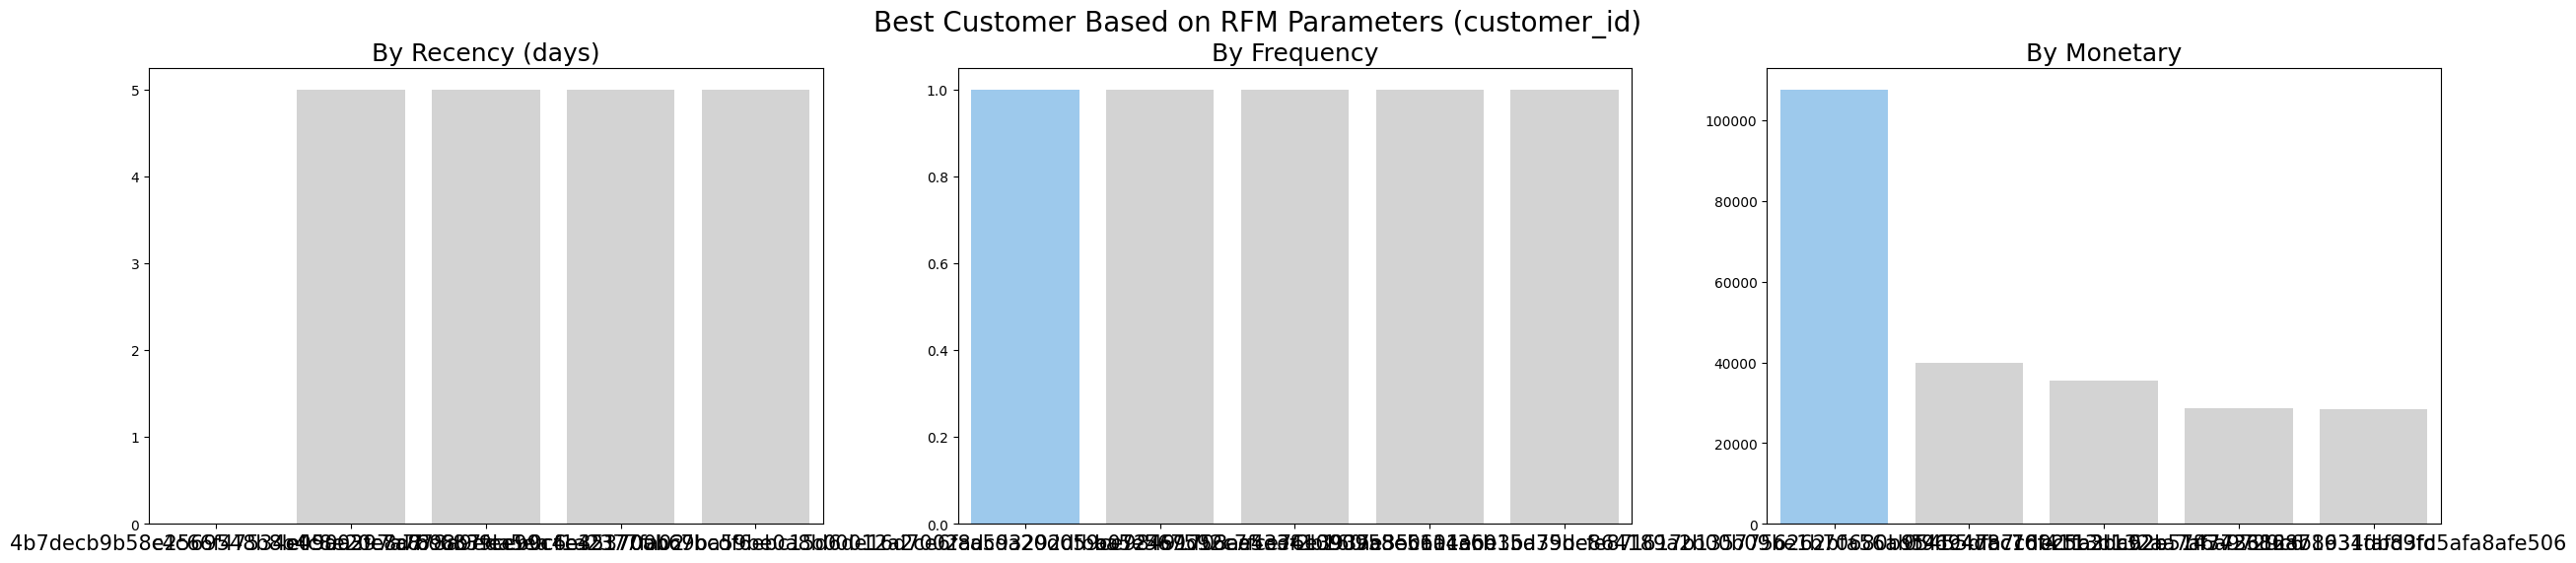

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

#visualisasi recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

#visualisasi frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

#visualisasi monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Produk apa yang memiliki rating paling tinggi dan paling rendah?

### Produk yang memiliki rating tertinggi

In [ ]:
final_df['review_score'] = pd.to_numeric(final_df['review_score'], errors='coerce')

average_rating = final_df.groupby(['product_id', 'product_category_name']).agg(
    review_score=('review_score', 'mean')
).reset_index()

average_rating.columns = ['product_id', 'product_category_name', 'average_rating']

top_average_rating = average_rating.sort_values(by='average_rating', ascending=False).head(5)
top_average_rating

,product_id,product_category_name,average_rating
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,5.0
16905,871760e304a33f81d67fc135d2c437ac,cama_mesa_banho,5.0
16901,8707c6feb8f1d552e3d70b590481bec4,moveis_decoracao,5.0
16898,8705992a02b96945da8236fe126feca8,esporte_lazer,5.0
16896,8701ef265f73fd18064df16faa4104ae,alimentos,5.0


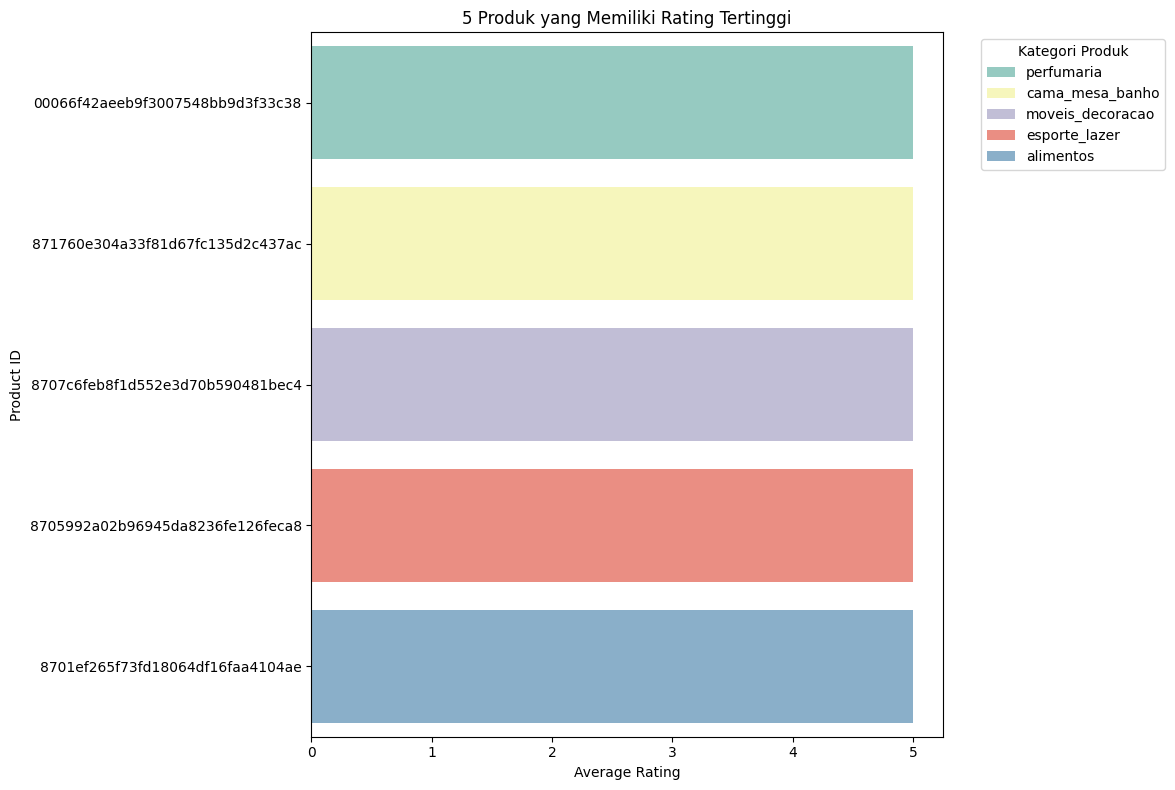

In [ ]:
top_average_rating = average_rating.sort_values(by='average_rating', ascending=False).head(5)

unique_categories = top_average_rating['product_category_name'].unique()
num_categories = len(unique_categories)
palette = sns.color_palette("Set3", num_categories)
category_colors = dict(zip(unique_categories, palette))

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_average_rating,
    x='average_rating',
    y='product_id',
    hue='product_category_name',
    palette=category_colors,
    dodge=False
)
plt.xlabel('Average Rating')
plt.ylabel('Product ID')
plt.title('5 Produk yang Memiliki Rating Tertinggi')
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa terdapat 5 produk teratas yang memiliki rating paling tinggi yaitu dengan nilai 5. Produk tersebut diantaranya adalah fffdb2d0ec8d6a61f0a0a0db3f25b441 dari informatica_acessorios, 00066f42aeeb9f3007548bb9d3f33c38 dari kategori perfumaria, fff9553ac224cec9d15d49f5a263411f	dari fashion_bolsas_e_acessorios,	ffeb228c521d5464d1f71444da96c446	dari telefonia	dan 	000b8f95fcb9e0096488278317764d19 dari utilidades_domesticas

### Produk yang memiliki rating paling rendah

In [ ]:
final_df['review_score'] = pd.to_numeric(final_df['review_score'], errors='coerce')

average_rating = final_df.groupby(['product_id', 'product_category_name']).agg(
    review_score=('review_score', 'mean')
).reset_index()

average_rating.columns = ['product_id', 'product_category_name', 'average_rating']

low_average_rating = average_rating.sort_values(by='average_rating', ascending=True).head(5)
low_average_rating

,product_id,product_category_name,average_rating
5649,2c41d13dc2cf0e9c2e8db8952f0f3ff3,informatica_acessorios,1.0
11886,5ea060e5498eaeee39d5dc4b4525b7ac,papelaria,1.0
20145,a171b306b69fe67a7bb0873d02e9cb98,perfumaria,1.0
16678,84ef572c9b97343b83ab437a3ad75461,eletroportateis,1.0
29464,ebd7c847c1e1cb69ec374ae0ebee1f4c,moveis_decoracao,1.0


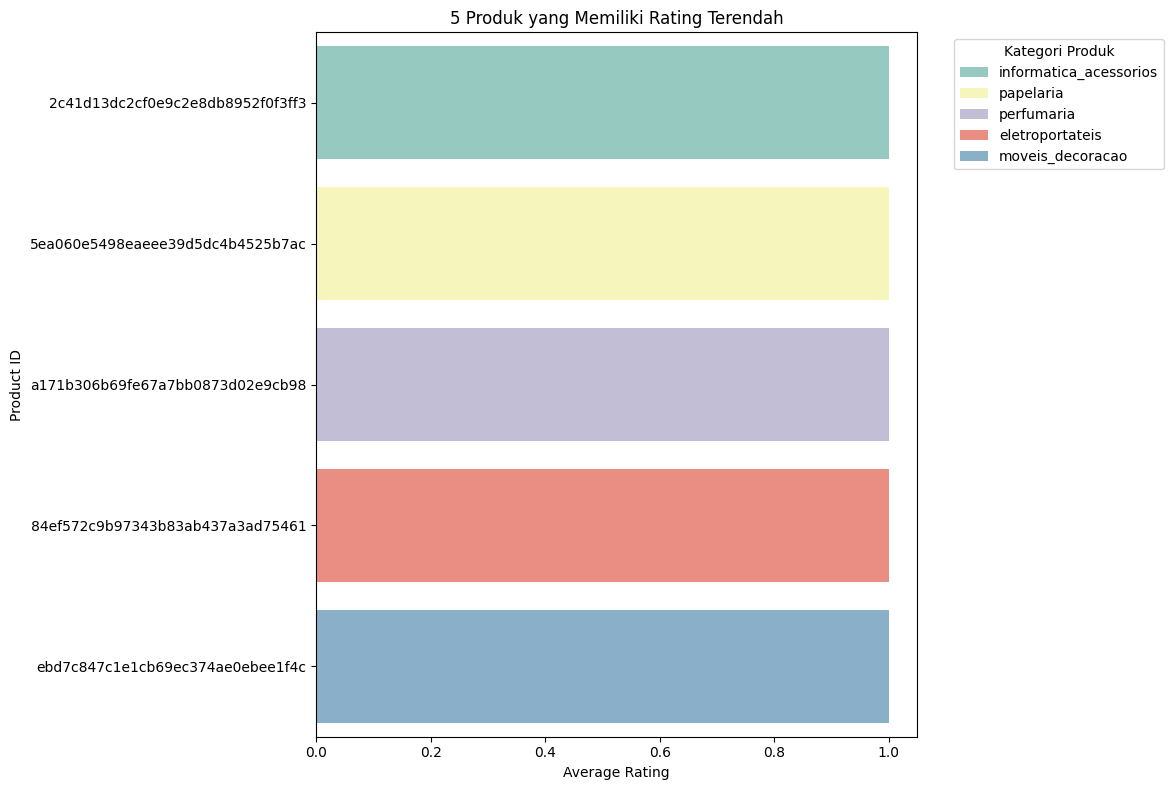

In [ ]:
low_average_rating = average_rating.sort_values(by='average_rating', ascending=True).head(5)

unique_categories = low_average_rating['product_category_name'].unique()
num_categories = len(unique_categories)
palette = sns.color_palette("Set3", num_categories)
category_colors = dict(zip(unique_categories, palette))


plt.figure(figsize=(12, 8))
sns.barplot(
    data=low_average_rating,
    x='average_rating',
    y='product_id',
    hue='product_category_name',
    palette=category_colors,
    dodge=False
)
plt.xlabel('Average Rating')
plt.ylabel('Product ID')
plt.title('5 Produk yang Memiliki Rating Terendah')
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Berdasarkan data di atas, dapat diketahui bahwa terdapat 5 produk teratas yang memiliki rating paling rendah yaitu dengan nilai 1. Produk tersebut diantaranya adalah 8db75af9aed3315374db44d7860e25da dari seguros_e_servicos, 8d619bd7604fa12d9153644097c3cf8e	dari pet_shop, 8d70502661e6c3f5012407bff1c36a5d	dari relogios_presentes, 8d26562bc0e89c3e3b83c1ab369534a4	dari moveis_decoracao, dan 8ccac7e503c0ba1f7e7b3aafeae52cca	dari moveis_decoracao

### Mengetahui kategori produk yang memiliki rating tertinggi

In [ ]:
average_category_rating = final_df.groupby(['product_category_name']).agg(
    average_rating=('review_score', 'mean')
).reset_index()

top_average_category_rating = average_category_rating.sort_values(by='average_rating', ascending=False).head(10)

top_average_category_rating

,product_category_name,average_rating
17,cds_dvds_musicais,4.611111
37,fashion_roupa_infanto_juvenil,4.600000
47,livros_importados,4.493671
22,construcao_ferramentas_ferramentas,4.450450
48,livros_interesse_geral,4.440602
64,portateis_casa_forno_e_cafe,4.337500
49,livros_tecnicos,4.292683
34,fashion_calcados,4.287834
50,malas_acessorios,4.245083
29,eletrodomesticos_2,4.229091


<ipython-input-133-02b8a9f66c91>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


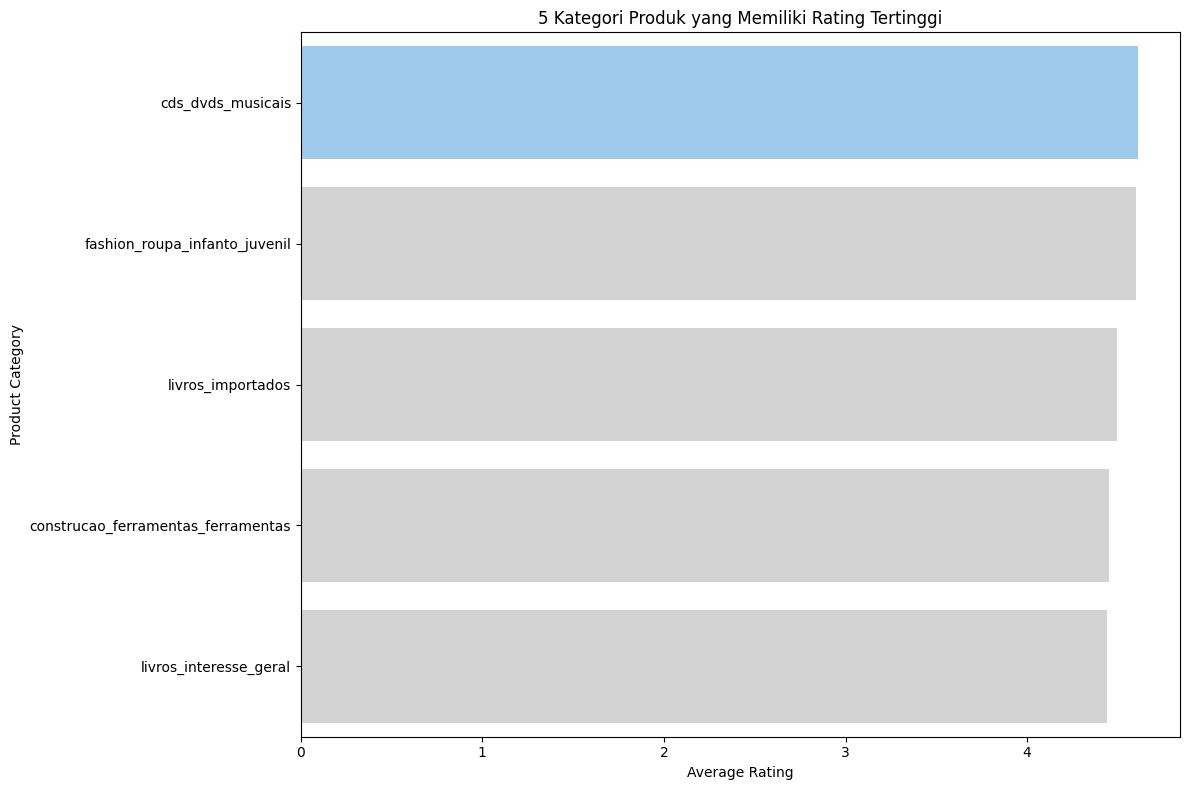

In [ ]:
top_average_category_rating = average_category_rating.sort_values(by='average_rating', ascending=False).head(5)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_average_category_rating,
    x='average_rating',
    y='product_category_name',
    palette=colors,
    dodge=False
)
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.title('5 Kategori Produk yang Memiliki Rating Tertinggi')
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa kategori produk yang memiliki rating tertinggi adalah kategori cds_dvds_musicais dengan rating sebesar 4.61.

### Mengetahui kategori produk yang memiliki rating terendah

In [ ]:
average_category_rating = final_df.groupby(['product_category_name']).agg(
    average_rating=('review_score', 'mean')
).reset_index()

top_average_category_rating = average_category_rating.sort_values(by='average_rating', ascending=True).head(10)

print(top_average_category_rating)

                            product_category_name  average_rating
67                             seguros_e_servicos        2.500000
42                                fraldas_higiene        2.652174
65  portateis_cozinha_e_preparadores_de_alimentos        3.125000
71                                 telefonia_fixa        3.171247
55                              moveis_escritorio        3.304557
15                                casa_conforto_2        3.368421
38                        fashion_roupa_masculina        3.398990
60                                       pc_gamer        3.416667
57                                    moveis_sala        3.446759
5                               artigos_de_festas        3.509091


<ipython-input-135-dc803cd9104e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


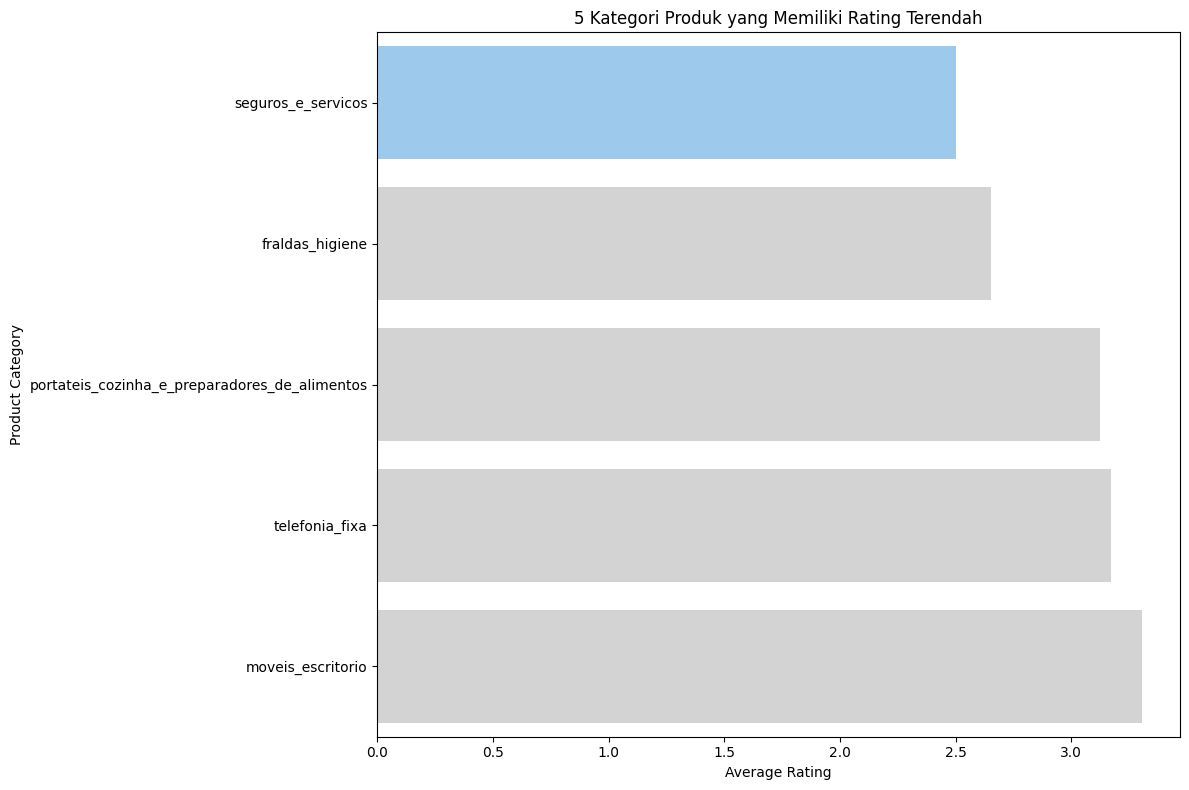

In [ ]:
low_average_category_rating = average_category_rating.sort_values(by='average_rating', ascending=True).head(5)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=low_average_category_rating,
    x='average_rating',
    y='product_category_name',
    palette=colors,
    dodge=False
)
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.title('5 Kategori Produk yang Memiliki Rating Terendah')
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat diketahui bahwa kategori produk yang memiliki rating tertinggi adalah kategori sugeros_e_servicos dengan rating sebesar 2.5.

### Analisis Musiman dan Tren Jangka Panjang

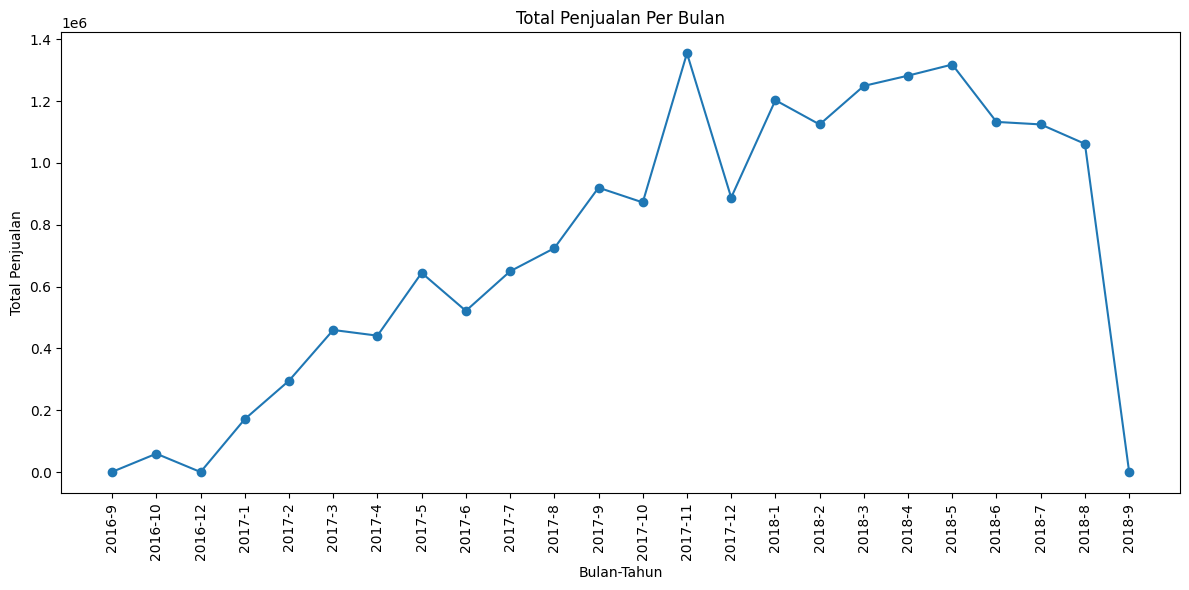

In [ ]:
#menambahkan kolom bulan, tahun, dan hari dalam minggu untuk analisis musiman
final_df['order_purchase_timestamp'] = pd.to_datetime(final_df['order_purchase_timestamp'])
final_df['year'] = final_df['order_purchase_timestamp'].dt.year
final_df['month'] = final_df['order_purchase_timestamp'].dt.month
final_df['day_of_week'] = final_df['order_purchase_timestamp'].dt.dayofweek

#total penjualan per bulan
monthly_sales = (
    final_df.groupby(['year', 'month'])
    .agg(
        total_sales=('price', 'sum'),
        total_orders=('order_id', 'count')
    )
    .reset_index()
    .sort_values(['year', 'month'])
)

monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month'], monthly_sales['total_sales'], marker='o', label='Total Sales')
plt.xticks(rotation=90)
plt.title("Total Penjualan Per Bulan")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Total Penjualan")
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat dilihat tren penjualan dan jumlah pesanan yang terjadi dari tahun 2016 hingga 2018. Pada awal periode, terutama pada bulan-bulan seperti September 2016 dan Desember 2016, total penjualan dan jumlah pesanan relatif rendah, dengan penjualan hanya mencapai sekitar 404.91 USD dan 10 pesanan pada bulan September 2016, serta 10.9 USD dan 1 pesanan pada bulan Desember 2016. Namun, pada tahun 2017, terjadi lonjakan signifikan dalam penjualan dan jumlah pesanan, dimulai dari Januari hingga Desember, dengan bulan Oktober 2017 dan November 2017 mencatatkan penjualan tertinggi di atas 1 juta USD dan jumlah pesanan mencapai lebih dari 12.000.

Pada tahun 2018, meskipun terdapat sedikit fluktuasi, total penjualan tetap menunjukkan angka yang tinggi, dengan bulan-bulan seperti Januari hingga Mei 2018 mencatatkan penjualan yang stabil di atas 1 juta USD setiap bulannya. Secara keseluruhan, data ini menunjukkan adanya tren positif yang berkelanjutan dalam penjualan dan jumlah pesanan, dengan puncak yang terlihat pada bulan Oktober dan November 2017. Selain itu, pola musiman dapat terlihat pada adanya lonjakan penjualan yang lebih tinggi pada beberapa bulan tertentu setiap tahunnya, terutama pada periode-periode akhir tahun dan awal tahun baru, yang mungkin terkait dengan faktor musiman atau promosi khusus yang terjadi pada waktu tersebut.

### Pengaruh Diskon terhadap Penjualan

In [ ]:
final_df['discount'] = final_df['price'] * 0.1  # diskon 10%

#total penjualan selama periode diskon
sales_with_discount = (
    final_df.groupby(['year', 'month', 'discount'])
    .agg(
        total_sales=('price', 'sum'),
        total_orders=('order_id', 'count')
    )
    .reset_index()
    .sort_values(['year', 'month'])
)
sales_with_discount.head(20)

,year,month,discount,total_sales,total_orders
0,2016,9,3.290,65.80,2
1,2016,9,3.999,79.98,2
2,2016,9,4.499,404.91,9
3,2016,10,0.600,6.00,1
4,2016,10,0.990,9.90,1
5,2016,10,1.000,10.00,1
6,2016,10,1.190,11.90,1
7,2016,10,1.490,149.00,10
8,2016,10,1.500,15.00,1
9,2016,10,1.690,50.70,3


Berdasarkan data di atas, terlihat bahwa pengaruh promosi dan diskon terhadap penjualan terlihat jelas melalui variasi total penjualan dan jumlah pesanan yang terjadi setiap bulan. Pada bulan September 2016, diskon sebesar 3.290 menghasilkan total penjualan sebesar 65.80 dari 2 pesanan, sementara diskon sebesar 4.499 menghasilkan total penjualan yang jauh lebih tinggi, yaitu 404.91 dari 9 pesanan. Hal ini menunjukkan bahwa diskon yang lebih besar cenderung mendorong peningkatan total penjualan.

Pada bulan Oktober 2016, terdapat variasi lebih besar dalam tingkat diskon dan pengaruhnya terhadap penjualan. Misalnya, diskon sebesar 1.490 menghasilkan total penjualan sebesar 149.00 dari 10 pesanan, sedangkan diskon sebesar 1.983 menghasilkan total penjualan yang jauh lebih besar, yaitu 356.94, meskipun hanya dengan 18 pesanan. Sebaliknya, diskon kecil seperti 0.600 atau 0.990 menghasilkan total penjualan yang lebih rendah, masing-masing sebesar 6.00 dan 9.90, dari hanya 1 pesanan.

Secara keseluruhan, data ini menunjukkan bahwa pemberian diskon memiliki pengaruh signifikan terhadap total penjualan. Tingkat diskon yang lebih tinggi cenderung menghasilkan total penjualan yang lebih besar, meskipun tidak selalu berbanding lurus dengan jumlah pesanan.

### Pengaruh Waktu Pengiriman terhadap Kepuasan dan Penjualan

     delivery_time  total_sales  total_orders
0              0.0      4946.70            49
1              1.0    218332.19          2656
2              2.0    438174.69          5499
3              3.0    601525.55          6091
4              4.0    716560.65          8029
..             ...          ...           ...
138          189.0        39.90             1
139          191.0       399.00             1
140          194.0       901.13             3
141          195.0       159.90             1
142          208.0       144.99             1

[143 rows x 3 columns]


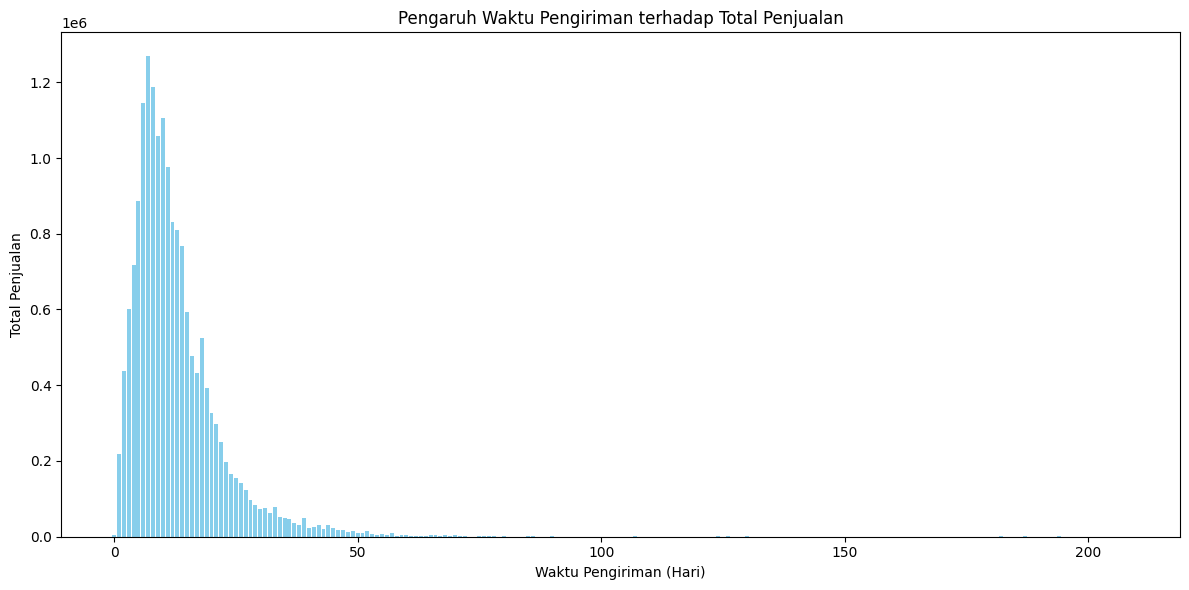

In [ ]:
final_df['delivery_time'] = (pd.to_datetime(final_df['order_delivered_customer_date']) -
                             pd.to_datetime(final_df['order_purchase_timestamp'])).dt.days

#pengaruh waktu pengiriman terhadap total penjualan
delivery_time_sales = final_df.groupby('delivery_time').agg(
    total_sales=('price', 'sum'),
    total_orders=('order_id', 'count')
).reset_index()

print(delivery_time_sales)

#visualisasi
plt.figure(figsize=(12, 6))
plt.bar(delivery_time_sales['delivery_time'], delivery_time_sales['total_sales'], color='skyblue')
plt.title("Pengaruh Waktu Pengiriman terhadap Total Penjualan")
plt.xlabel("Waktu Pengiriman (Hari)")
plt.ylabel("Total Penjualan")
plt.tight_layout()
plt.show()

Berdasarkan data di atas, dapat dilihat bahwa waktu pengiriman memiliki pengaruh signifikan terhadap total penjualan dan jumlah pesanan. Secara umum, semakin cepat waktu pengiriman, semakin tinggi total penjualan dan jumlah pesanan yang tercatat. Misalnya, pada waktu pengiriman 0 hari, tercatat total penjualan sebesar 4,946.70 dengan 49 pesanan, sedangkan waktu pengiriman 1 hari menghasilkan total penjualan sebesar 218,332.19 dengan 2,656 pesanan. Jumlah ini terus meningkat seiring bertambahnya waktu pengiriman hingga mencapai puncaknya pada waktu pengiriman 4 hari, dengan total penjualan sebesar 716,560.65 dari 8,029 pesanan.

Sebaliknya, waktu pengiriman yang lebih lama menunjukkan penurunan signifikan dalam total penjualan dan jumlah pesanan. Sebagai contoh, pada waktu pengiriman 194 hari, total penjualan hanya sebesar 901.13 dengan 3 pesanan, dan waktu pengiriman 208 hari hanya mencatat total penjualan 144.99 dengan 1 pesanan.

Data ini mengindikasikan bahwa pengiriman yang lebih cepat cenderung meningkatkan kepuasan pelanggan, yang pada gilirannya mendorong peningkatan penjualan. Sebaliknya, pengiriman yang lebih lambat dapat menyebabkan penurunan kepercayaan pelanggan, berakibat pada penurunan jumlah pesanan dan total penjualan.

### Hubungan Rating dan Penjualan

   review_score  total_sales  total_orders
0             1   2878500.82         26089
1             2    662675.06          6380
2             3   1399282.71         13954
3             4   3193591.80         29035
4             5   9363430.53         84301


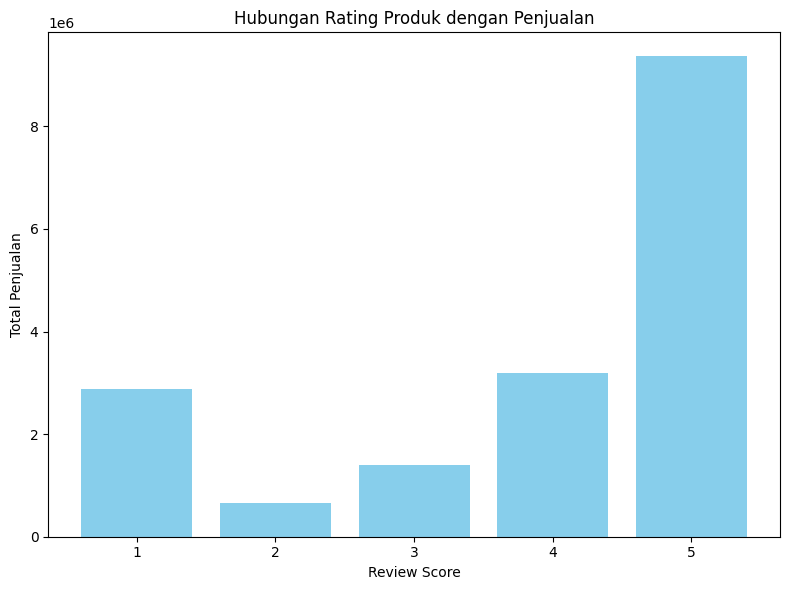

In [ ]:
rating_sales = final_df.groupby("review_score").agg(
    total_sales=("price", "sum"),
    total_orders=("order_id", "count")
).reset_index().sort_values("review_score")

print(rating_sales)

plt.figure(figsize=(8, 6))
plt.bar(rating_sales['review_score'], rating_sales['total_sales'], color='skyblue')
plt.title("Hubungan Rating Produk dengan Penjualan")
plt.xlabel("Review Score")
plt.ylabel("Total Penjualan")
plt.tight_layout()
plt.show()

Berdasarkan data di atas, terlihat adanya hubungan positif antara rating produk dan total penjualan serta jumlah pesanan. Produk dengan rating tertinggi, yaitu 5.0, mencatatkan total penjualan terbesar sebesar 9,363,430.53USD dan jumlah pesanan mencapai 84,301. Hal ini menunjukkan bahwa produk dengan rating tinggi cenderung mendapatkan lebih banyak perhatian dan kepercayaan dari pelanggan, yang berujung pada peningkatan penjualan dan jumlah pesanan.

Di sisi lain, produk dengan rating lebih rendah, seperti 1.0, mencatatkan total penjualan sebesar 2,878,500.82USD dengan jumlah pesanan 26,089. Meskipun angkanya masih signifikan, jumlah pesanan produk ini jauh lebih rendah dibandingkan dengan produk dengan rating tinggi. Hal ini mengindikasikan bahwa produk dengan rating rendah masih dapat terjual, namun cenderung kurang diminati oleh pelanggan dibandingkan produk dengan ulasan yang lebih positif.

Secara keseluruhan, data ini menggambarkan bahwa produk dengan rating tinggi cenderung menarik lebih banyak pelanggan, meningkatkan total penjualan, dan menghasilkan lebih banyak pesanan. Sebaliknya, produk dengan rating rendah cenderung memiliki penjualan dan pesanan yang lebih sedikit, yang mungkin menjadi indikasi adanya ketidakpuasan pelanggan terhadap kualitas produk atau layanan yang diberikan

### Hubungan Harga dengan Volume Penjualan

        price  total_sales  total_orders
0        0.85         3.40             4
1        1.20       504.00           420
2        2.20         4.40             2
3        2.29         2.29             1
4        2.90         2.90             1
...       ...          ...           ...
5844  4590.00      4590.00             1
5845  4690.00      4690.00             1
5846  4799.00      4799.00             1
5847  6499.00      6499.00             1
5848  6735.00      6735.00             1

[5849 rows x 3 columns]


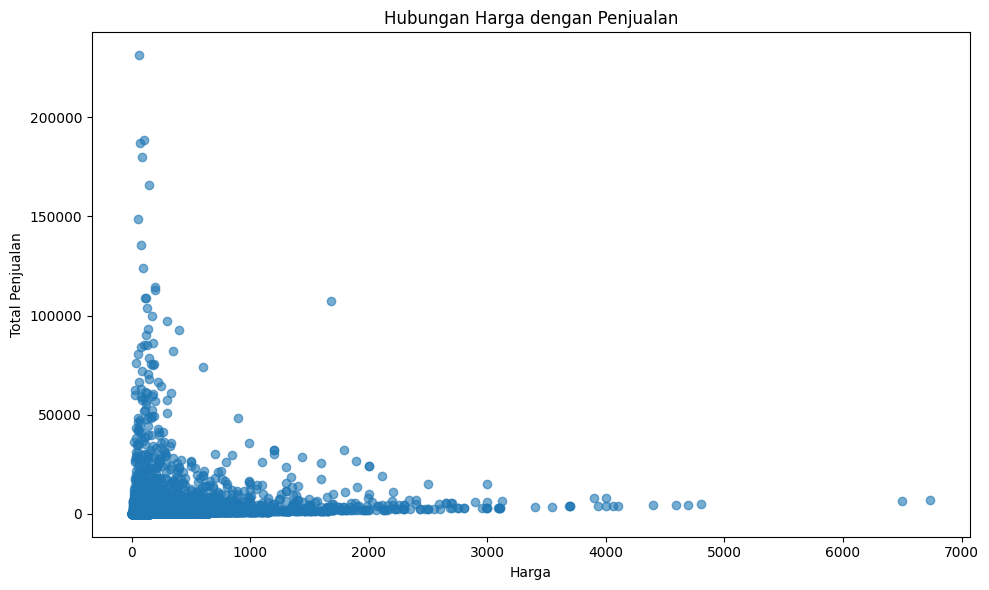

In [ ]:
price_sales = final_df.groupby("price").agg(
    total_sales=("price", "sum"),
    total_orders=("order_id", "count")
).reset_index()
print(price_sales)

plt.figure(figsize=(10, 6))
plt.scatter(price_sales['price'], price_sales['total_sales'], alpha=0.6)
plt.title("Hubungan Harga dengan Penjualan")
plt.xlabel("Harga")
plt.ylabel("Total Penjualan")
plt.tight_layout()
plt.show()

Analisis menunjukkan bahwa mayoritas volume penjualan terkonsentrasi pada produk dengan harga rendah hingga menengah. Grafik memperlihatkan bahwa produk dengan harga rendah memiliki volume penjualan yang tinggi, meskipun total penjualannya mungkin terbatas. Di sisi lain, produk dengan harga tinggi menunjukkan volume penjualan yang rendah, tetapi beberapa di antaranya mencatat total penjualan yang cukup besar, meskipun jarang terjual.

Pola ini mengindikasikan bahwa produk dengan harga rendah lebih diminati oleh pelanggan karena daya belinya lebih terjangkau, sedangkan produk dengan harga tinggi mungkin menarik segmen pelanggan tertentu yang mencari kualitas atau nilai eksklusif.

### Pengaruh Waktu Pembelian terhadap Volume Penjualan

    hour_of_day  total_sales  total_orders
0             0    402121.13          3785
1             1    180064.21          1694
2             2     77655.69           907
3             3     41830.30           431
4             4     30489.94           402
5             5     24703.24           280
6             6     68212.87           739
7             7    192729.53          1811
8             8    507871.93          4781
9             9    905174.12          7625
10           10   1076152.28         10192
11           11   1125094.37         10652
12           12   1077896.76          9792
13           13   1135378.19         10626
14           14   1279313.98         11371
15           15   1304094.73         10796
16           16   1233709.71         11129
17           17   1077633.19          9766
18           18   1033620.97          9555
19           19   1002326.51          9139
20           20   1064335.09          9546
21           21   1027022.20          9344
22         

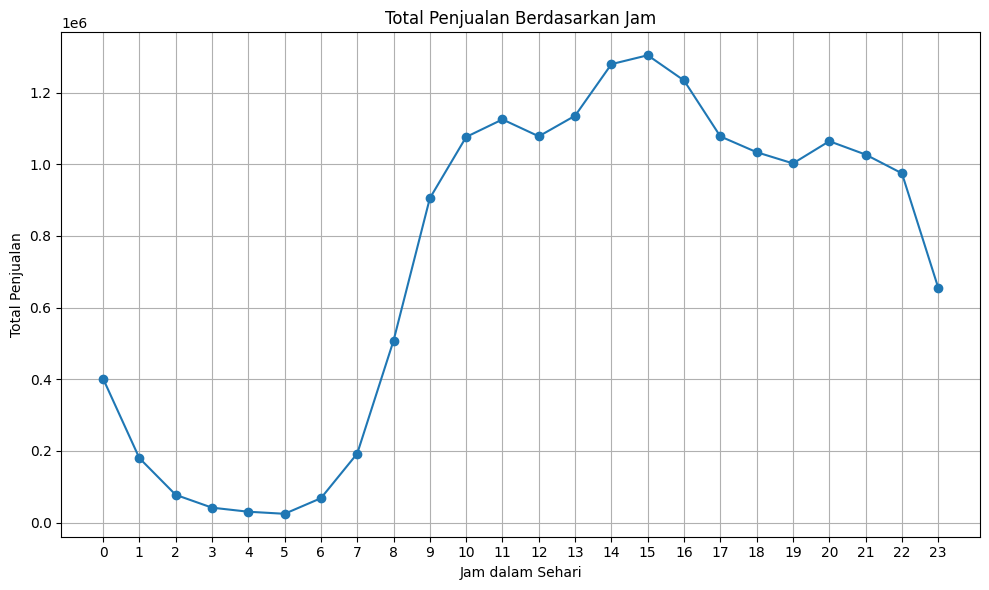

In [ ]:
#menambah kolom jam pembelian
final_df['hour_of_day'] = final_df['order_purchase_timestamp'].dt.hour

hourly_sales = final_df.groupby("hour_of_day").agg(
    total_sales=("price", "sum"),
    total_orders=("order_id", "count")
).reset_index()

print(hourly_sales)

plt.figure(figsize=(10, 6))
plt.plot(hourly_sales['hour_of_day'], hourly_sales['total_sales'], marker='o')
plt.title("Total Penjualan Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Total Penjualan")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan data yang ada, terdapat pola yang jelas mengenai waktu pembelian dan volume penjualan. Waktu pembelian pada jam tertentu menunjukkan pengaruh signifikan terhadap total penjualan dan jumlah pesanan. Rentang waktu jam 9 pagi hingga 3 sore mencatatkan total penjualan dan jumlah pesanan tertinggi, dengan puncak terjadi pada jam 14 dan 15. Pada jam 14, total penjualan mencapai sekitar 1,28 juta USD dengan 11.371 pesanan, sementara pada jam 15, penjualan meningkat menjadi sekitar 1,30 juta USD dengan 10.796 pesanan. Hal ini menunjukkan bahwa konsumen cenderung lebih aktif berbelanja pada siang hingga sore hari, kemungkinan besar karena waktu tersebut lebih nyaman atau sesuai dengan rutinitas mereka.

Sebaliknya, penjualan pada dini hari (jam 0 hingga 5) menunjukkan total penjualan dan jumlah pesanan yang jauh lebih rendah. Contohnya, pada jam 3 dini hari, total penjualan hanya mencapai sekitar 41 ribu USD dari 431 pesanan. Tren ini mengindikasikan bahwa aktivitas belanja sangat rendah pada jam-jam tersebut, yang mungkin disebabkan oleh sebagian besar konsumen tidak aktif berbelanja pada malam hingga dini hari.

Secara keseluruhan, waktu pembelian memengaruhi volume penjualan secara signifikan. Puncak aktivitas belanja terjadi pada jam 9 pagi hingga 3 sore, terutama menjelang siang hingga sore hari. Informasi ini dapat dimanfaatkan oleh pengelola bisnis untuk mengoptimalkan strategi pemasaran atau promosi pada jam-jam dengan volume pembelian yang tinggi, serta mempertimbangkan strategi khusus untuk meningkatkan penjualan di jam-jam dengan aktivitas yang lebih rendah.

# **Modeling**

## Feature selection

Kolom yang relevan untuk analisis dipilih dari dataset final_df, yaitu customer_id, product_id, dan review_score. Kolom customer_id merepresentasikan identitas pelanggan, product_id adalah identitas produk yang dinilai, dan review_score adalah nilai atau rating yang diberikan oleh pelanggan terhadap produk tersebut. Selanjutnya, memastikan tidak ada missing values pada ketiga kolom tersebut. Ini penting agar data yang digunakan untuk melatih model tidak memiliki nilai yang hilang yang dapat mengganggu proses pelatihan dan prediksi model.

In [ ]:
data = data[['customer_id', 'product_id', 'review_score']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159759 entries, 0 to 159758
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   159759 non-null  object
 1   product_id    159759 non-null  object
 2   review_score  159759 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
data.head(10)

,customer_id,product_id,review_score
0,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,4
1,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,4
2,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,4
3,b0830fb4747a6c6d20dea0b8c802d7ef,595fac2a385ac33a80bd5114aec74eb8,4
4,41ce2a54c0b03bf3443c3d931a367089,aa4383b373c6aca5d8797843e5594415,5
5,f88197465ea7920adcdbec7375364d82,d0b61bfb1de832b15ba9d266ca96e5b0,5
6,8ab97904e6daea8866dbdbc4fb7aad2c,65266b2da20d04dbe00c5c2d3bb7859e,5
7,503740e9ca751ccdda7ba28e9ab8f608,060cb19345d90064d1015407193c233d,4
8,9bdf08b4b3b52b5526ff42d37d47f222,4520766ec412348b8d4caa5e8a18c464,5
9,f54a9f0e6b351c431402b8461ea51999,ac1789e492dcd698c5c10b97a671243a,1


In [ ]:
data.isna().sum()

,0
customer_id,0
product_id,0
review_score,0


## Mengkodekan customer_id dan product_id menjadi kategori numerik

Kolom customer_id dan product_id yang awalnya berupa nilai kategorikal diubah menjadi representasi numerik. Proses ini mengubah setiap kategori unik dalam kolom tersebut menjadi angka yang sesuai, di mana setiap nilai kategori diberikan kode numerik yang berbeda.

In [ ]:
data['customer_id'] = data['customer_id'].astype('category').cat.codes
data['product_id'] = data['product_id'].astype('category').cat.codes

## Membuat target

Kolom review_score digunakan untuk membuat kolom baru bernama target. Perkondisian (data['review_score'] >= 4) memeriksa apakah nilai pada kolom review_score lebih besar dari atau sama dengan 4, yang mengindikasikan bahwa ulasan tersebut dianggap positif. Hasil dari perkondisian ini adalah nilai boolean, yaitu True atau False. Lalu, .astype(int) digunakan untuk mengubah nilai boolean tersebut menjadi angka, di mana True diubah menjadi 1 dan False diubah menjadi 0. Sehingga, kolom target akan berisi nilai 1 untuk ulasan yang positif (nilai review_score 4 atau lebih) dan 0 untuk ulasan yang negatif atau netral (nilai review_score kurang dari 4).

In [ ]:
data['target'] = (data['review_score'] >= 4).astype(int)

Proses ini penting untuk pemodelan nantinya, prediksi apakah pelanggan akan menyukai produk atau tidak, sehingga dapat membantu dalam memberikan rekomendasi produk yang relevan.

## Membagi data menjadi data training dan data testing

Dataset data dibagi menjadi dua bagian: data pelatihan (training) dan data pengujian (testing) menggunakan metode randomSplit(). Fungsi ini membagi dataset secara acak berdasarkan proporsi yang ditentukan, dalam hal ini 80% data digunakan untuk pelatihan dan 20% untuk pengujian.

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['customer_id', 'product_id']].values
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Membangun model

Model rekomendasi berbasis NCF (Neural Collaborative Filtering) dibangun dengan menggunakan neural network untuk memprediksi interaksi antara pengguna dan produk. Model ini terdiri dari beberapa komponen utama, pertama, dua embedding layer untuk pengguna dan produk yang masing-masing menghasilkan representasi vektor dari ID pengguna dan ID produk. Kemudian, vektor-vektor ini di-flatten dan digabungkan dalam lapisan GMF (Generalized Matrix Factorization) yang menggabungkan keduanya. Selanjutnya, model ini menggunakan lapisan MLP (Multilayer Perceptron) yang menerima representasi pengguna dan produk untuk mempelajari hubungan non-linear antara keduanya. Lapisan MLP terdiri dari beberapa lapisan Dense, diikuti oleh lapisan Dropout untuk mencegah overfitting.

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Parameter
num_users = data['customer_id'].nunique()
num_items = data['product_id'].nunique()
embedding_dim = 32

# Input layers
user_input = Input(shape=(1,), name='user_input')
item_input = Input(shape=(1,), name='item_input')

# Embedding layers dengan regularisasi
user_embedding = Embedding(num_users, embedding_dim, name='user_embedding', embeddings_regularizer=l2(1e-4))(user_input)
item_embedding = Embedding(num_items, embedding_dim, name='item_embedding', embeddings_regularizer=l2(1e-4))(item_input)

# Flatten embeddings untuk GMF (Generalized Matrix Factorization)
user_vec = Flatten()(user_embedding)
item_vec = Flatten()(item_embedding)

# GMF: Dot product antara user_vec dan item_vec
gmf = Concatenate()([user_vec, item_vec])

# MLP: Setelah menggabungkan embedding, kita akan melewati beberapa dense layers
mlp_user_vec = Dense(64, activation='relu')(user_vec)
mlp_item_vec = Dense(64, activation='relu')(item_vec)
mlp = Concatenate()([mlp_user_vec, mlp_item_vec])

# Fully connected layers untuk MLP
mlp_dense1 = Dense(64, activation='relu')(mlp)
mlp_dense2 = Dense(32, activation='relu')(mlp_dense1)
mlp_output = Dropout(0.4)(mlp_dense2)

#menggabungkan GMF dan MLP untuk menghasilkan prediksi
merged = Concatenate()([gmf, mlp_output])
output = Dense(1, activation='sigmoid')(merged)

# Compile model
model = Model(inputs=[user_input, item_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_input (InputLayer)   │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 32)          │      3,075,456 │ user_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ item_embedding            │ (None, 1, 32)          │      1,023,456 │ item_input[0][0]       │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 32)             │              0 │ user_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 32)             │              0 │ item_embedding[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │          2,112 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          2,112 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128)            │              0 │ dense[0][0],           │
│ (Concatenate)             │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │          8,256 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 32)             │          2,080 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64)             │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32)             │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 96)             │              0 │ concatenate[0][0],     │
│ (Concatenate)             │                        │                │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │             97 │ concatenate_2[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,113,569 (15.69 MB)

 Trainable params: 4,113,569 (15.69 MB)

 Non-trainable params: 0 (0.00 B)

Hasil dari GMF dan MLP digabungkan kembali dan diteruskan ke lapisan output yang menghasilkan nilai prediksi antara 0 dan 1 menggunakan aktivasi sigmoid. Model ini kemudian disusun dan dicompile dengan optimizer Adam, menggunakan binary crossentropy sebagai fungsi loss untuk klasifikasi biner (relevansi atau tidak relevansi), dan diukur menggunakan akurasi.

## Menggunakan callback

Menggunakan dua callback dari Keras untuk meningkatkan kinerja model selama pelatihan. Callback pertama yaitu ReduceLROnPlateau yang digunakan untuk mengurangi learning rate secara otomatis ketika model tidak menunjukkan perbaikan pada val_loss (loss pada data validasi) dalam beberapa epoch berturut-turut, dengan faktor pengurangan sebesar 0.5. Callback ini juga memastikan bahwa learning rate tidak turun lebih rendah dari nilai minimum yang telah ditentukan, yaitu 1e-6. Callback kedua yaitu EarlyStopping yang berfungsi untuk menghentikan pelatihan lebih awal jika tidak ada perbaikan pada val_loss selama sejumlah epoch berturut-turut, yang ditentukan oleh parameter patience sebesar 5 epoch.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

#callback untuk dynamic learning rate dan early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Jika pelatihan dihentikan lebih awal, model akan kembali ke kondisi terbaik berdasarkan bobot terbaik yang ditemukan selama pelatihan. Kedua callback ini membantu mencegah overfitting dan memastikan pelatihan yang efisien.

## Menghitung class weights

Menghitung class weights untuk menangani ketidakseimbangan kelas dalam dataset. Dengan menggunakan compute_class_weight, bobot dihitung secara proporsional berdasarkan jumlah sampel di setiap kelas, memberikan bobot lebih besar pada kelas minoritas dan lebih kecil pada kelas mayoritas.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
#class weights untuk menangani ketidakseimbangan data
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

Hasilnya disimpan dalam dictionary (class_weights_dict) yang digunakan saat pelatihan model untuk meningkatkan prediksi pada kelas minoritas.

## Melatih model

Melatih model selama 50 epoch dengan batch size 256, menggunakan 20% data untuk validasi. class_weight diterapkan untuk menangani ketidakseimbangan kelas. Dua callback, ReduceLROnPlateau dan EarlyStopping, digunakan untuk menyesuaikan pembelajaran dan menghentikan pelatihan lebih awal jika kinerja tidak meningkat.

In [ ]:
#latih model
history = model.fit([X_train[:, 0], X_train[:, 1]], y_train,
                    batch_size=256,
                    epochs=50,
                    validation_split=0.2,
                    class_weight=class_weights_dict,
                    callbacks=[reduce_lr, early_stopping])

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6669 - loss: 0.7095 - val_accuracy: 0.8758 - val_loss: 0.3532 - learning_rate: 5.0000e-04
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9884 - loss: 0.0817 - val_accuracy: 0.8842 - val_loss: 0.3134 - learning_rate: 5.0000e-04
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9983 - loss: 0.0307 - val_accuracy: 0.8841 - val_loss: 0.3524 - learning_rate: 5.0000e-04
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.0226 - val_accuracy: 0.8833 - val_loss: 0.3445 - learning_rate: 5.0000e-04
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0187 - val_accuracy: 0.8830 - val_loss: 0.4727 - learning_rate: 5.0000e-04
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.0149 - val_accuracy: 0.8827 - val_loss: 0.5240 - learning_rate: 2.5000e-04
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

## Evaluasi model

In [ ]:
#evaluasi modelny
loss, accuracy = model.evaluate([X_test[:, 0], X_test[:, 1]], y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

999/999 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8878 - loss: 0.3093
Loss: 0.3095003366470337, Accuracy: 0.887393593788147


Hasil evaluasi menunjukkan bahwa nilai loss pada data uji adalah sekitar 0.302, sementara akurasi model mencapai 88.7%. Hal ini menunjukkan model cukup efektif dalam memprediksi target pada data uji.

## Hyperparameter tuning menggunakan Keras Tuner

Melakukan hyperparameter tuning menggunakan Keras Tuner untuk menemukan kombinasi parameter terbaik dalam membangun model rekomendasi.

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.0 MB/s eta 0:00:00


Parameter yang diuji meliputi dimensi embedding, jumlah unit di layer dense, dan learning rate. Proses ini menggunakan RandomSearch dengan 10 percobaan, memanfaatkan data yang telah dibagi untuk pelatihan dan validasi. Untuk menangani ketidakseimbangan kelas, class weights diterapkan, dan early stopping digunakan agar pelatihan berhenti lebih cepat jika tidak ada peningkatan performa. Setelah proses tuning, model terbaik dievaluasi pada data validasi, menghasilkan metrik loss dan akurasi.

In [ ]:
#disini melakukan hyperparameter tuning buat nyari parameter terbaik untuk bangun/update modelnya
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

#membangun model dengan parameter yang di-tune
def build_model(hp):

    num_users = data['customer_id'].nunique()
    num_items = data['product_id'].nunique()

    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    #parameter Tuning: dimensi Embedding
    embedding_dim = hp.Int('embedding_dim', min_value=16, max_value=128, step=16)

    #embedding layers
    user_embedding = Embedding(num_users, embedding_dim)(user_input)
    item_embedding = Embedding(num_items, embedding_dim)(item_input)

    #flatten the embeddings
    user_vec = Flatten()(user_embedding)
    item_vec = Flatten()(item_embedding)

    #concatenate user dan item embeddings
    concat = Concatenate()([user_vec, item_vec])

    #fully connected layers dengan tuning jumlah unit
    dense1 = Dense(hp.Int('dense_units_1', min_value=32, max_value=128, step=32), activation='relu')(concat)
    dense2 = Dense(hp.Int('dense_units_2', min_value=32, max_value=128, step=32), activation='relu')(dense1)

    #dropout layer untuk regularisasi
    dropout = Dropout(0.4)(dense2)

    #output layer
    output = Dense(1, activation='sigmoid')(dropout)

    #membuat dan mengcompile model
    model = Model(inputs=[user_input, item_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='log')),
                  loss='binary_crossentropy', metrics=['accuracy'])

    return model

#membagi data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#cari class weights untuk menangani ketidakseimbangan kelas
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

#hyperparameter tuner menggunakan RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  #10 kali percobaan
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='recommendation_model_tuning'
)

#callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#pencarian hyperparameter
tuner.search([X_train[:, 0], X_train[:, 1]], y_train,
             epochs=20,
             batch_size=256,
             validation_data=([X_val[:, 0], X_val[:, 1]], y_val),
             class_weight=class_weights_dict,
             callbacks=[early_stopping])

#hasil tuning terbaik
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hyperparameters)

#vvaluasi model terbaik pada data validasi
loss, accuracy = best_model.evaluate([X_val[:, 0], X_val[:, 1]], y_val)
print(f"Best Model Loss: {loss}, Accuracy: {accuracy}")

Trial 10 Complete [00h 00m 16s]
val_accuracy: 0.8552203178405762

Best val_accuracy So Far: 0.8552203178405762
Total elapsed time: 00h 04m 19s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7f4c22126020>
999/999 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8542 - loss: 0.3425
Best Model Loss: 0.34301847219467163, Accuracy: 0.8552203178405762


Hasil hyperparameter tuning menunjukkan bahwa model terbaik yang ditemukan memiliki performa yang cukup baik dengan nilai akurasi sebesar 85.52% dan loss sebesar 0.3430. Akurasi yang tinggi ini mengindikasikan bahwa model mampu memprediksi preferensi pengguna terhadap produk dengan tingkat keberhasilan yang signifikan, yaitu 85%. Nilai loss yang relatif rendah juga mengindikasikan bahwa model memiliki kemampuan generalisasi yang baik, artinya model tidak terlalu overfitting dan mampu memprediksi data yang belum pernah dilihat dengan cukup akurat.

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:", best_hyperparameters.values)

Best Hyperparameters: {'embedding_dim': 80, 'dense_units_1': 64, 'dense_units_2': 32, 'learning_rate': 0.0009742209100555859}


Hasil hyperparameter tuning menunjukkan bahwa model terbaik ditemukan dengan kombinasi hyperparameters berikut: embedding_dim 80, dense_units_1 64, dense_units_2 32, dan learning_rate 0.00097. Konfigurasi ini mengindikasikan bahwa model menggunakan representasi ukuran sedang untuk pengguna dan produk, dengan dua hiden layer yang memiliki 96 dan 64 unit masing-masing. Laju pembelajaran yang kecil (0.00097) membantu model untuk melakukan pembaruan parameter secara perlahan, menghindari risiko melewatkan minima terbaik.

Jika laju pembelajaran (learning rate) terlalu tinggi, model bisa membuat langkah besar dalam mencari solusi, sehingga bisa melompati titik minima yang lebih baik. Sebaliknya, laju pembelajaran yang lebih kecil membantu model bergerak lebih hati-hati dan menemukan solusi yang lebih optimal atau mendekati solusi terbaik (global minimum) dalam ruang parameter. Dengan kombinasi ini, model dapat memprediksi dengan akurasi yang cukup tinggi, menunjukkan kinerja yang optimal.

## Evaluasi model terbaik pada data uji dan perhitungan Precision, Recall, dan F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

#evaluasi model terbaik hasil hyperparameter tuning
best_model = tuner.get_best_models(num_models=1)[0]

y_pred = best_model.predict([X_test[:, 0], X_test[:, 1]])
y_pred_binary = (y_pred >= 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

999/999 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Precision: 0.8738
Recall: 0.9309
F1-score: 0.9014


Hasil evaluasi model menunjukkan bahwa model memiliki performa yang sangat baik. Dengan precision sebesar 0.8738, model mampu memprediksi dengan akurasi yang tinggi tentang seberapa sering prediksi positifnya benar. Recall sebesar 0.9309 menunjukkan bahwa model berhasil menangkap sebagian besar data positif yang ada. F1-score sebesar 0.9014 mencerminkan keseimbangan antara precision dan recall, yang menunjukkan bahwa model ini dapat menghasilkan prediksi yang cukup akurat dan sensitif terhadap kelas positif.

## Menghitung Mean Reciprocal Rank (MRR)

MRR digunakan untuk mengukur kualitas urutan rekomendasi. MRR mengukur seberapa cepat model memberikan rekomendasi yang relevan di urutan teratas. Semakin tinggi nilai MRR, semakin baik model dalam memberikan rekomendasi yang relevan di posisi teratas.

In [ ]:
#hitung mrr ->mengukur kualitas urutan rekomendasi
import numpy as np

def mean_reciprocal_rank(y_true, y_pred):

    mrr = 0
    for true, pred in zip(y_true, y_pred):
        if true == 1:
            rank = np.argmax(pred) + 1
            mrr += 1 / rank
    return mrr / len(y_true)

y_pred_probs = best_model.predict([X_test[:, 0], X_test[:, 1]])

mrr_score = mean_reciprocal_rank(y_test, y_pred_probs)
print(f"Mean Reciprocal Rank (MRR): {mrr_score:.4f}")

999/999 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Mean Reciprocal Rank (MRR): 0.7112


Hasil evaluasi dengan Mean Reciprocal Rank (MRR) sebesar 0.7112 menunjukkan bahwa model memiliki kemampuan yang baik dalam memberikan rekomendasi yang relevan pada urutan teratas. MRR mengukur seberapa cepat model memberikan prediksi yang benar dalam daftar rekomendasi. Dengan nilai 0.7112, ini berarti rata-rata produk yang relevan ditemukan di posisi yang cukup dekat dengan urutan pertama. Nilai ini menunjukkan bahwa model cukup baik dalam memberikan rekomendasi yang relevan, meskipun tidak selalu di posisi pertama. Bisa diartikan bahwa produk yang relevan biasanya muncul di posisi kedua atau ketiga dalam banyak kasus, yang masih bisa dianggap sangat berguna bagi pengguna. Jadi, meskipun tidak sempurna, nilai MRR ini menunjukkan bahwa model memberikan rekomendasi yang cukup baik dan relevan bagi banyak pelanggan.

# **Kesimpulan**

Proyek penerapan sistem rekomendasi menggunakan model Neural Collaborative Filtering (NCF) berhasil meningkatkan kemampuan model dalam memprediksi preferensi pengguna terhadap produk, yang berpotensi besar dalam meningkatkan penjualan dan kepuasan pelanggan. Melalui proses Hyperparameter Tuning menggunakan Keras Tuner, model berhasil menemukan kombinasi parameter terbaik yang menghasilkan akurasi yang tinggi dan performa yang optimal. Evaluasi yang dilakukan dengan berbagai metrik, seperti precision, recall, F1-score, dan Mean Reciprocal Rank (MRR), menunjukkan bahwa model memiliki kemampuan yang cukup baik dalam memberikan rekomendasi yang relevan dan akurat kepada pengguna. Meskipun masih ada potensi untuk peningkatan lebih lanjut, hasil yang dicapai menunjukkan bahwa sistem rekomendasi ini dapat menjadi alat yang efektif untuk meningkatkan pengalaman pengguna dalam berbelanja, serta berpotensi mendorong peningkatan penjualan dan kepuasan pelanggan. Hasil yang diperoleh menunjukkan bahwa sistem rekomendasi berbasis Neural Collaborative Filtering (NCF) dapat menjadi solusi terbaik untuk diterapkan pada platform e-commerce yang mengutamakan personalisasi dalam pengalaman belanja pengguna.